# COMP6252 - Deep Learning Technologies Coursework 1

## Install packages

* torch : An open-source machine learning library for Python. Offers an adaptable framework for neural network building and training.

* torchvision : Provides  tools and utilities for working with computer vision tasks.

In [1]:
!pip install torch
!pip install torchvision

## Import necessary Packages

We will now import the necessary packages required to run the project correctly.
These are Python packages/modules that are commonly used for various tasks in deep learning, deep learning, data manipulation, visualization, and evaluation:

* os : Gives access to functionality that is exclusive to your operating system.
  
* torch nn : With PyTorch, this module facilitates the construction of neural network topologies.

* torch.nn.functional : Offers a number of functions that are useful for neural network operations and may be used on tensors.
  
* torch.optim : The optimization techniques in this module are used to optimize neural network parameters as they are being trained.
  
* torchvision : Includes model architectures, image transformations, and widely used datasets for computer vision applications.
  
* PIL (Python Imaging Library) : Numerous picture file types may be opened, edited, and saved using it.

* transforms : Used in image preprocessing, this package offers standard image transformations including scaling, cropping, and normalizing.

* datasets : Offers the ability to download and load popular datasets.

* ImageFolder : Facilitates the creation of a dataset consisting of pictures organized into folders, each of which represents a class.

* DataLoader : During training and assessment, it facilitates the creation of iterable data loaders that load data into batches.

* pandas : A powerful Python data processing toolkit. Offers functions and data structures for working with time series data and numerical tables.
  
* numpy :  A core Python library for scientific computing. Large, multi-dimensional arrays and matrices are supported, and a number of mathematical operations may be performed on these arrays.

* zipfile : Allows us to write, read, list, append, and create ZIP files.
  
* seaborn : A matplotlib-based library for data visualization. Offers a sophisticated drawing tool for creating attractive and statistical visuals.
  
* matplotlib.pyplot : Offers an interface for making plots and visualizations that is similar to MATLAB.data in batches.

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from PIL import Image
import torch.optim as optim
from torch.optim import SGD, Adam
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
import zipfile
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,  precision_recall_curve, classification_report, accuracy_score, auc
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Dataset and Resizing the images

We can upload the dataset from our files by specifying the correct part, or we can use kaggle to upload it.
Then we resize the images to 180 x 180.

In [2]:
# Define transformations for images
# Resizing the images to 180 x 180

resize_transform = transforms.Resize((180, 180))
tensor_transform = transforms.ToTensor()

# Combine transformations
transform = transforms.Compose([
    resize_transform,
    tensor_transform
])

In [3]:
# Load image data
data_dir = 'C:/Users/DELL/Downloads/DLTCW/music-genre-dataset/Data/images_original'
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [5]:
# !pip install kaggle
# from google.colab import files
# files.upload()  # Select the kaggle.json file from your local machine

In [6]:
# Move the API key to the required location
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
# !kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

# Unzip the dataset
# with zipfile.ZipFile('gtzan-dataset-music-genre-classification.zip', 'r') as zip_ref:
 #    zip_ref.extractall('gtzan_dataset')

# List the contents of the extracted folder
# !ls gtzan_dataset

In [7]:
# Define the path to your dataset folder
# data_dir = 'gtzan_dataset/Data/images_original'

# Load the dataset using ImageFolder
# dataset = datasets.ImageFolder(data_dir, transform=transform)

In [8]:
# dataset_dir_features = 'gtzan_dataset/Data/'

# Define the file paths for the CSV files
# features_3_sec_csv_path = dataset_dir_features + 'features_3_sec.csv'
# features_30_sec_csv_path = dataset_dir_features + 'features_30_sec.csv'

# Read the CSV files into DataFrame
# features_3_sec_df = pd.read_csv(features_3_sec_csv_path)
# features_30_sec_df = pd.read_csv(features_30_sec_csv_path)

In [4]:
#Loading the CSV files
features_3_sec_csv_path = 'C:/Users/DELL/Downloads/DLTCW/music-genre-dataset/Data/features_3_sec.csv'
features_30_sec_csv_path = 'C:/Users/DELL/Downloads/DLTCW/music-genre-dataset/Data/features_30_sec.csv'

features_3_sec_df = pd.read_csv(features_3_sec_csv_path)
features_30_sec_df = pd.read_csv(features_30_sec_csv_path)

#### Custom class ImageGenreDataset:
In order to handle picture data arranged according to genres, it develops a special dataset type. It loads pictures from a given directory, gives each one a numeric label determined by the genre folders, and lets you apply optional image modifications. This class may be used in conjunction with PyTorch's DataLoader to make training and assessment easier for tasks involving the genre categorization of images.


In [5]:
class ImageGenreDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []  # List to store paths of all images
        self.labels = []       # List to store corresponding labels

        # Get the list of genre folders in the root directory
        genre_folders = os.listdir(root_dir)

        # Assign a label to each genre folder
        for label, genre_folder in enumerate(genre_folders):
            genre_path = os.path.join(root_dir, genre_folder)
            image_files = os.listdir(genre_path)

            # Append image paths and corresponding labels to lists
            self.image_paths.extend([os.path.join(genre_path, img) for img in image_files])
            self.labels.extend([label] * len(image_files))

    def __len__(self):
        # Return the total number of images in the dataset.
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Retrieve an image and its label at the specified index.
        # Returns tuple: A tuple containing the image and its label.
      
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open the image and convert it to RGB format
        img = Image.open(img_path).convert('RGB')

        # Apply any specified transformations to the image
        if self.transform:
            img = self.transform(img)

        return img, label

# Testing the custom dataset
custom_dataset = ImageGenreDataset(data_dir, transform=transform)
print("Custom Dataset Length:", len(custom_dataset))

# Get a sample image and its label
sample_img, sample_label = custom_dataset[0]
print("Sample Image Shape:", sample_img.shape)
print("Sample Label:", sample_label)

Custom Dataset Length: 999
Sample Image Shape: torch.Size([3, 180, 180])
Sample Label: 0


In [6]:
# Calculates the number of classes and retrieves their names from the dataset for analysis
num_classes = len(dataset.classes)
class_names = dataset.classes

print("Number of classes:", num_classes)
print("Class names:", class_names)

Number of classes: 10
Class names: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [7]:
# Calculate total number of images from the dataset
num_images = len(dataset)
print("Total number of images:", num_images)

Total number of images: 999


### Split the dataset

Divide a dataset into three distinct subsets: training, validation, and testing sets. The size of each subset based on predefined proportions— 70% for training, 20% for validation, and the remaining portion for testing. 
Utilizing PyTorch's random_split() function, the dataset is split randomly into the specified proportions. 

In [26]:
# Define the sizes of each split
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split the dataset randomly
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Verify the sizes of each split
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 699
Validation set size: 199
Test set size: 101


### Define Data loaders

We establish the data loaders.  
Every loader is designed to work with a certain subset of the dataset, be it testing, validation, or training. 

While the 'val_loader' and 'test_loader' share the same batch size but do not shuffle their respective datasets—a common practice for validation and test data to ensure consistency during evaluation. The 'train_loader' is configured with a batch size of 32 and allows for data shuffling to introduce randomness during training epochs. 
No extra processes are generated for the purpose of loading data, as shown by the parameter 'num_workers' being set to 0 across all loaders. 

By configuring these loaders, it increases the efficiency and makes it easier to train and assess models on different subsets.

In [27]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=0, shuffle=True)
val_loader = DataLoader(val_dataset,num_workers=0, batch_size=32)
test_loader = DataLoader(test_dataset,num_workers=0, batch_size=32)

In [28]:
print(f"Number of batches in training DataLoader: {len(train_loader)}")
print(f"Number of batches in validation DataLoader: {len(val_loader)}")
print(f"Number of batches in test DataLoader: {len(test_loader)}")

Number of batches in training DataLoader: 22
Number of batches in validation DataLoader: 7
Number of batches in test DataLoader: 4


In [29]:
# Print the size of the first batch from each DataLoader
for loader_name, loader in zip(["training", "validation", "test"], [train_loader, val_loader, test_loader]):
    print(f"\nSize of the first batch in {loader_name} DataLoader:")
    for images, labels in loader:
        print("Images shape:", images.shape)
        print("Labels shape:", labels.shape)
        break


Size of the first batch in training DataLoader:
Images shape: torch.Size([32, 3, 180, 180])
Labels shape: torch.Size([32])

Size of the first batch in validation DataLoader:
Images shape: torch.Size([32, 3, 180, 180])
Labels shape: torch.Size([32])

Size of the first batch in test DataLoader:
Images shape: torch.Size([32, 3, 180, 180])
Labels shape: torch.Size([32])



Based on CUDA availability, this line of code chooses the device (CPU or GPU) for PyTorch operations. It sets the device to 'cuda' for CUDA-enabled GPUs; if not, it defaults to 'cpu' for CPU-based processing.

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Function train_model

Using a given criteria (loss function), optimizer, and training data loader, this function trains a particular model over a predetermined number of epochs. The training data stream is iterated over, the loss is calculated, backpropagation is carried out, and the model parameters are updated in accordance with the optimizer's optimization procedure inside each epoch. To track the success of the training, the average loss is printed after every period.

In [13]:
# Define training function
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            running_loss += loss.item() * images.size(0)  # Accumulate the loss
        epoch_loss = running_loss / len(train_dataset)  # Calculate epoch loss
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")  # Print epoch loss

### Function evaluate_model

Using a supplied data loader, this method assesses the performance of a particular model. It is then put into evaluation mode, and iteratively through the data loader, predictions are computed for every data batch. It computes the prediction accuracy of the model about the dataset's actual labels. The model's accuracy on the given dataset is returned. 

To evaluate the model's performance on unknown data without changing the model's parameters, this function is crucial.

In [14]:
# Define evaluation function
def evaluate_model(model, data_loader):
    model.eval() 
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
            total += labels.size(0)  # Accumulate total count of images
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = correct / total  # Calculate accuracy
    return accuracy  # Return accuracy

### Function get_all_predictions

This function takes the predictions from a given model and gathers them from a specified data loader together with the accompanying ground truth labels. The model is switched to evaluation mode, the data loader is iterated over, predictions are computed for each batch of data, and the predictions and labels are appended to distinct lists. Ultimately, these lists with all of the predictions and ground truth labels, respectively, are returned. For evaluation purposes, this function may be used to generate predictions on a dataset and compare them to the real labels.


In [15]:
def get_all_predictions(model, data_loader):
    all_predictions = []  # List to store all predicted labels
    all_targets = []      # List to store all true labels
    model.eval() 
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predicted labels
            all_predictions.extend(predicted.cpu().numpy())  # Extend list with predicted labels
            all_targets.extend(labels.cpu().numpy())  # Extend list with true labels
    return all_predictions, all_targets  # Return predictions and targets

### Function calculate_classwise_accuracy
This method compares predictions with ground truth labels to determine the accuracy of each class to assess how well a model performs on a dataset. It counts the number of accurate predictions and samples in each class. Lastly, class-wise accuracy is computed, taking sample-free circumstances into account. This feature makes it easier to evaluate the model's effectiveness quickly for different classes.

In [16]:
def calculate_classwise_accuracy(model, data_loader, num_classes):
    model.eval()
    class_correct = [0] * num_classes  # List to store correct predictions for each class
    class_total = [0] * num_classes    # List to store total instances for each class

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
            for i in range(len(labels)):
                # Update correct predictions and total instances for each class
                class_correct[labels[i]] += (predicted[i] == labels[i]).item()
                class_total[labels[i]] += 1

    # Calculate class-wise accuracy
    class_accuracy = [class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    return class_accuracy  # Return class-wise accuracies

# Four architectures:
## 1. A fully connected network with two hidden layers.

### Class Net 1

This code defines a neural network model called 'Net1' using PyTorch's 'nn.Module' class. 

In the '__init__' method, it initializes the layers of the neural network:
* 'fc1' : Linear layer with input size 'input_size' and output size 'hidden_size1'.
* 'relu1' : ReLU activation function applied after the first linear layer.
* 'fc2' : Linear layer with input size 'hidden_size1' and output size 'hidden_size2'.
* 'relu2' : ReLU activation function applied after the second linear layer.
* 'flatten': Flatten layer to reshape the input tensor.
* 'fc3' : Linear layer with input size 'hidden_size2' and output size 'num_classes'.

In the 'forward' method, it defines the forward pass of the neural network:
* Reshape the input tensor (x) using 'view'.
* Pass the reshaped tensor through the linear layers ('fc1', 'fc2', 'fc3') and apply ReLU activations ('relu1', 'relu2') after the first two linear layers.
  
This neural network architecture consists of two hidden layers with ReLU activations and a final output layer, making it suitable for classification tasks.

In [20]:
class Net1(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Net1, self).__init__()
        # Define the first fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        # Define the ReLU activation function
        self.relu1 = nn.ReLU()
        # Define the second fully connected layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        # Define the ReLU activation function
        self.relu2 = nn.ReLU()
        # Flatten the input
        self.flatten = nn.Flatten()
        # Define the third fully connected layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

Now define the model parameters and print them.

In [16]:
# Define model parameters
input_size = 180 * 180 * 3
hidden_size1 = 256
hidden_size2 = 128
num_classes = len(dataset.classes)

In [17]:
print("Model Parameters:")
print("Input Size:", input_size)
print("Hidden Layer 1 Size:", hidden_size1)
print("Hidden Layer 2 Size:", hidden_size2)
print("Number of Classes:", num_classes)

Model Parameters:
Input Size: 97200
Hidden Layer 1 Size: 256
Hidden Layer 2 Size: 128
Number of Classes: 10


#### Training the model: 

Train the model for '50 epochs' and '100 epochs' separately. 

In [24]:
# Train Net1 for 50 epochs
net1_50epochs = Net1(input_size, hidden_size1, hidden_size2, num_classes).to(device)  # Instantiate the neural network
criterion = nn.CrossEntropyLoss()  # Define the loss function
optimizer = optim.Adam(net1_50epochs.parameters(), lr=0.001)  # Define the optimizer
train_model(net1_50epochs, criterion, optimizer, train_loader, num_epochs=50)  # Train the model for 50 epochs

Epoch [1/50], Loss: 6.1379
Epoch [2/50], Loss: 2.4288
Epoch [3/50], Loss: 2.1992
Epoch [4/50], Loss: 2.0326
Epoch [5/50], Loss: 2.0383
Epoch [6/50], Loss: 1.8869
Epoch [7/50], Loss: 1.8637
Epoch [8/50], Loss: 1.7623
Epoch [9/50], Loss: 1.7000
Epoch [10/50], Loss: 1.6153
Epoch [11/50], Loss: 1.5273
Epoch [12/50], Loss: 1.4251
Epoch [13/50], Loss: 1.4160
Epoch [14/50], Loss: 1.3425
Epoch [15/50], Loss: 1.3077
Epoch [16/50], Loss: 1.2649
Epoch [17/50], Loss: 1.2930
Epoch [18/50], Loss: 1.2043
Epoch [19/50], Loss: 1.0848
Epoch [20/50], Loss: 1.0268
Epoch [21/50], Loss: 1.0008
Epoch [22/50], Loss: 0.8951
Epoch [23/50], Loss: 0.9081
Epoch [24/50], Loss: 0.9629
Epoch [25/50], Loss: 0.8185
Epoch [26/50], Loss: 0.7131
Epoch [27/50], Loss: 0.7753
Epoch [28/50], Loss: 0.6713
Epoch [29/50], Loss: 0.6227
Epoch [30/50], Loss: 0.6315
Epoch [31/50], Loss: 0.6333
Epoch [32/50], Loss: 0.6330
Epoch [33/50], Loss: 0.6334
Epoch [34/50], Loss: 0.7279
Epoch [35/50], Loss: 0.5301
Epoch [36/50], Loss: 0.5155
E

In [28]:
# Train Net1 for 100 epochs
net1_100epochs = Net1(input_size, hidden_size1, hidden_size2, num_classes).to(device)
optimizer = optim.Adam(net1_100epochs.parameters(), lr=0.001)
train_model(net1_100epochs, criterion, optimizer, train_loader, num_epochs=100)

Epoch [1/100], Loss: 7.0107
Epoch [2/100], Loss: 2.2281
Epoch [3/100], Loss: 2.1106
Epoch [4/100], Loss: 1.9233
Epoch [5/100], Loss: 1.8220
Epoch [6/100], Loss: 1.7112
Epoch [7/100], Loss: 1.7410
Epoch [8/100], Loss: 1.6501
Epoch [9/100], Loss: 1.4861
Epoch [10/100], Loss: 1.5673
Epoch [11/100], Loss: 1.5809
Epoch [12/100], Loss: 1.4216
Epoch [13/100], Loss: 1.2646
Epoch [14/100], Loss: 1.2622
Epoch [15/100], Loss: 1.2277
Epoch [16/100], Loss: 1.0797
Epoch [17/100], Loss: 1.1032
Epoch [18/100], Loss: 1.0909
Epoch [19/100], Loss: 0.9675
Epoch [20/100], Loss: 0.9508
Epoch [21/100], Loss: 0.8825
Epoch [22/100], Loss: 0.8511
Epoch [23/100], Loss: 0.7524
Epoch [24/100], Loss: 0.9267
Epoch [25/100], Loss: 0.6529
Epoch [26/100], Loss: 0.6530
Epoch [27/100], Loss: 0.5719
Epoch [28/100], Loss: 0.4841
Epoch [29/100], Loss: 0.6311
Epoch [30/100], Loss: 0.5866
Epoch [31/100], Loss: 0.4515
Epoch [32/100], Loss: 0.3797
Epoch [33/100], Loss: 0.4814
Epoch [34/100], Loss: 0.3660
Epoch [35/100], Loss: 0

#### Evaluation on Training set

Calculate the accuracy of Net1 on the training set after 50 epochs and 100 epochs.

In [25]:
# Evaluate Net1 on the training set after 50 epochs
train_accuracy_50epochs = evaluate_model(net1_50epochs, train_loader)
print(f"Training Accuracy after 50 epochs: {train_accuracy_50epochs:.4f}")

Training Accuracy after 50 epochs: 0.8555


In [29]:
# Evaluate Net1 on the training set after 100 epochs
train_accuracy_100epochs = evaluate_model(net1_100epochs, train_loader)
print(f"Training Accuracy after 100 epochs: {train_accuracy_100epochs:.4f}")

Training Accuracy after 100 epochs: 0.9986


#### Validation

Validate Net1 Model by calculating the accuracy of the model on the validation set.

In [26]:
# Validate Net1 on the validation set after 50 epochs
val_accuracy_50epochs = evaluate_model(net1_50epochs, val_loader)
print(f"Validation Accuracy after 50 epochs: {val_accuracy_50epochs:.4f}")

Validation Accuracy after 50 epochs: 0.4171


In [30]:
# Validate Net1 on the validation set after 100 epochs
val_accuracy_100epochs = evaluate_model(net1_100epochs, val_loader)
print(f"Validation Accuracy after 100 epochs: {val_accuracy_100epochs:.4f}")

Validation Accuracy after 100 epochs: 0.4975


#### Testing

Test the Net1 Model on the test dataset.

In [27]:
# Test Net1 on the test set after 50 epochs
test_accuracy_50epochs = evaluate_model(net1_50epochs, test_loader)
print(f"Test Accuracy after 50 epochs: {test_accuracy_50epochs:.4f}")

Test Accuracy after 50 epochs: 0.3663


In [31]:
# Test Net1 on the test set after 100 epochs
test_accuracy_100epochs = evaluate_model(net1_100epochs, test_loader)
print(f"Test Accuracy after 100 epochs: {test_accuracy_100epochs:.4f}")

Test Accuracy after 100 epochs: 0.5545


#### Evaluation of all the results of Net1

##### 1. Create Confusion Matrix

Plot a Confusion matrix for 50 epochs and 100 epochs.

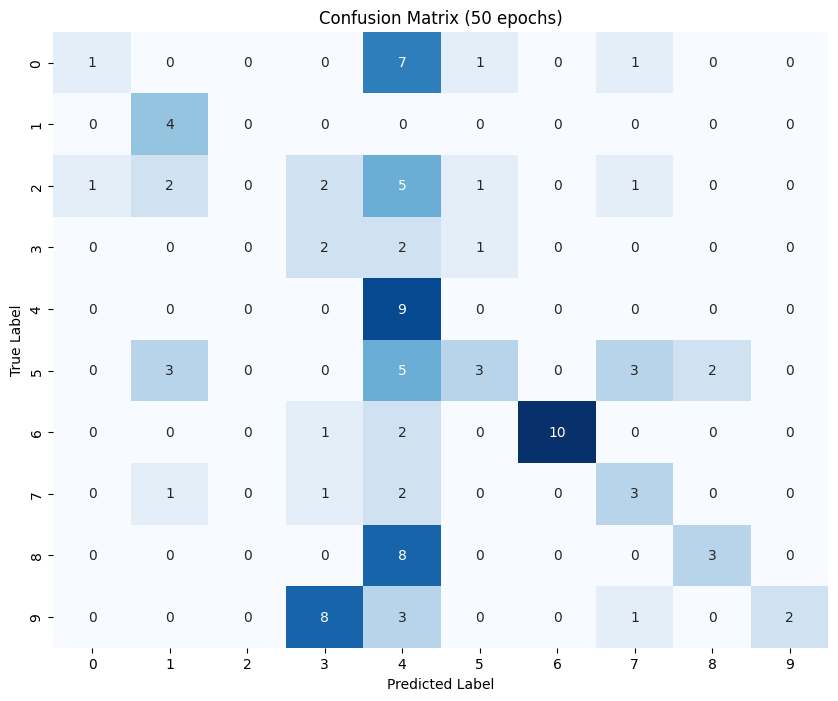

In [32]:
all_predictions, all_targets = get_all_predictions(net1_50epochs, test_loader)

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (50 epochs)')
plt.show()

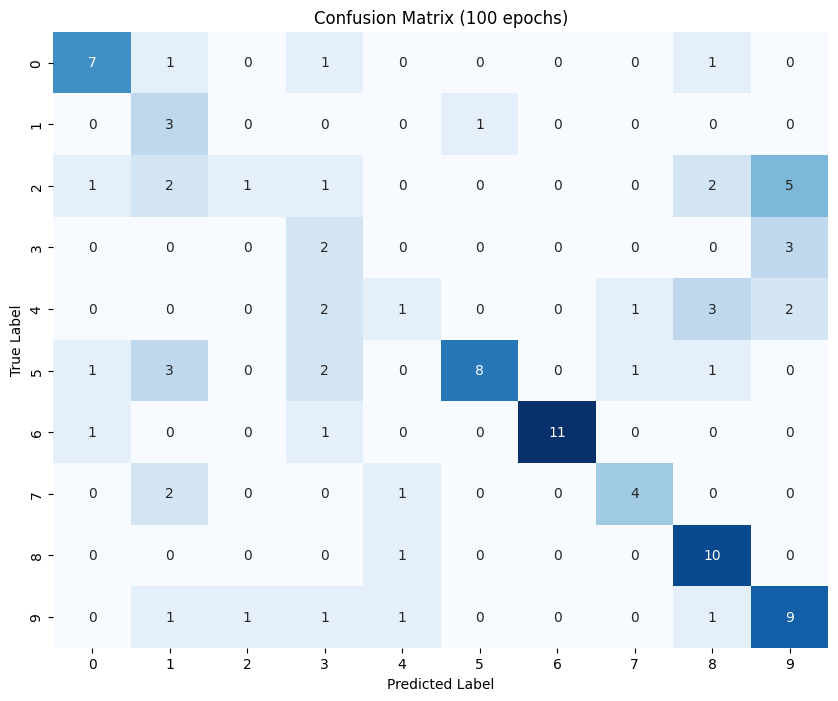

In [33]:
all_predictions_100epochs, all_targets_100epochs = get_all_predictions(net1_100epochs, test_loader)

# Calculate confusion matrix for the model trained for 100 epochs
cm_100epochs = confusion_matrix(all_targets_100epochs, all_predictions_100epochs)

# Plot confusion matrix for the model trained for 100 epochs
plt.figure(figsize=(10, 8))
sns.heatmap(cm_100epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (100 epochs)')
plt.show()

##### 2. Generate the Classification report

It provides detailed evaluation metrics for each class in a multi-class classification problem for 50 and 100 epochs.

In [37]:
# Calculate classification report for 50 epochs
report = classification_report(all_targets, all_predictions, target_names=class_names, zero_division=1)
print("Classification Report (50 epochs):")
print(report)

Classification Report (50 epochs):
              precision    recall  f1-score   support

       blues       0.50      0.10      0.17        10
   classical       0.40      1.00      0.57         4
     country       1.00      0.00      0.00        12
       disco       0.14      0.40      0.21         5
      hiphop       0.21      1.00      0.35         9
        jazz       0.50      0.19      0.27        16
       metal       1.00      0.77      0.87        13
         pop       0.33      0.43      0.38         7
      reggae       0.60      0.27      0.37        11
        rock       1.00      0.14      0.25        14

    accuracy                           0.37       101
   macro avg       0.57      0.43      0.34       101
weighted avg       0.64      0.37      0.34       101



In [38]:
# Calculate classification report for the model trained for 100 epochs
report_100epochs = classification_report(all_targets_100epochs, all_predictions_100epochs, target_names=class_names, zero_division=1)
print("Classification Report (100 epochs):")
print(report_100epochs)

Classification Report (100 epochs):
              precision    recall  f1-score   support

       blues       0.70      0.70      0.70        10
   classical       0.25      0.75      0.38         4
     country       0.50      0.08      0.14        12
       disco       0.20      0.40      0.27         5
      hiphop       0.25      0.11      0.15         9
        jazz       0.89      0.50      0.64        16
       metal       1.00      0.85      0.92        13
         pop       0.67      0.57      0.62         7
      reggae       0.56      0.91      0.69        11
        rock       0.47      0.64      0.55        14

    accuracy                           0.55       101
   macro avg       0.55      0.55      0.50       101
weighted avg       0.61      0.55      0.54       101



##### 3. Calculate the Precision, Recall and F1-score

For each class, Calculate the Precision Recall and F1-score for 100 epochs. Also calculate the overall metrics.

In [40]:
# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(all_targets_100epochs, all_predictions_100epochs, average=None)
recall_per_class = recall_score(all_targets_100epochs, all_predictions_100epochs, average=None)
f1_per_class = f1_score(all_targets_100epochs, all_predictions_100epochs, average=None)

# Create a dictionary to store class-wise evaluation metrics
class_metrics = {
    "Class": class_names,
    "Precision": precision_per_class,
    "Recall": recall_per_class,
    "F1-score": f1_per_class
}

# Print class-wise evaluation metrics
class_metrics_df = pd.DataFrame(class_metrics)
print(class_metrics_df)

       Class  Precision    Recall  F1-score
0      blues   0.700000  0.700000  0.700000
1  classical   0.250000  0.750000  0.375000
2    country   0.500000  0.083333  0.142857
3      disco   0.200000  0.400000  0.266667
4     hiphop   0.250000  0.111111  0.153846
5       jazz   0.888889  0.500000  0.640000
6      metal   1.000000  0.846154  0.916667
7        pop   0.666667  0.571429  0.615385
8     reggae   0.555556  0.909091  0.689655
9       rock   0.473684  0.642857  0.545455


In [41]:
# Calculate overall precision, recall, and F1-score
overall_precision = precision_score(all_targets_100epochs, all_predictions_100epochs, average='weighted')
overall_recall = recall_score(all_targets_100epochs, all_predictions_100epochs, average='weighted')
overall_f1 = f1_score(all_targets_100epochs, all_predictions_100epochs, average='weighted')

# Print overall evaluation metrics
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-score:", overall_f1)

Overall Precision: 0.6126889004689943
Overall Recall: 0.5544554455445545
Overall F1-score: 0.5407838013812749


##### 4. Plot the Precision-Recall curve

For each class, Plot the Precision-Recall curve for 100 epochs.

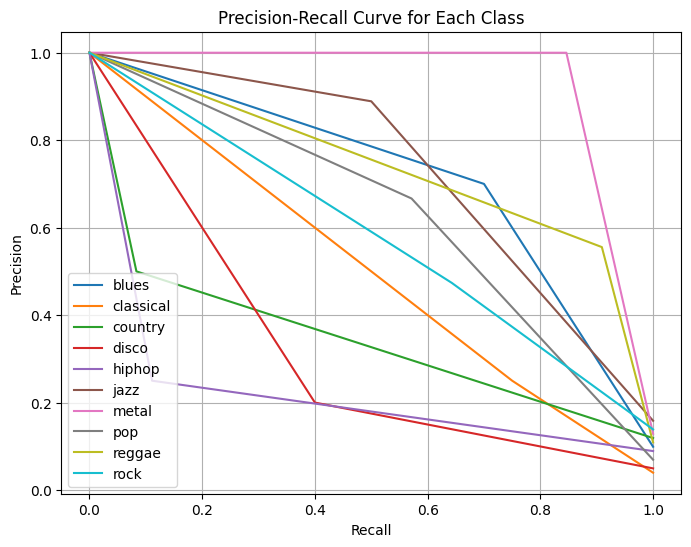

In [43]:
# Initialize empty lists to store precision and recall for each class
precision_per_class = []
recall_per_class = []

# Iterate over each class
for i in range(num_classes):
    # Treat the current class as positive, and all other classes as negative
    y_true_class = [1 if label == i else 0 for label in all_targets_100epochs]
    y_score_class = [1 if label == i else 0 for label in all_predictions_100epochs]

    # Compute precision and recall for the current class
    precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)

    # Append precision and recall to the lists
    precision_per_class.append(precision)
    recall_per_class.append(recall)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    class_name = class_names[i]
    plt.plot(recall_per_class[i], precision_per_class[i], label=f'{class_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid(True)
plt.show()

##### 5. Calculate the area under the Precision-Recall curve.

For each class, Calculate the area under the Precision-Recall curve for 100 epochs.

In [45]:
# Initialize empty list to store area under curve for each class
auc_per_class = []

# Iterate over each class
for i in range(num_classes):
    # Treat the current class as positive, and all other classes as negative
    y_true_class = [1 if label == i else 0 for label in all_targets_100epochs]
    y_score_class = [1 if label == i else 0 for label in all_predictions_100epochs]

    # Compute precision and recall for the current class
    precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)

    # Calculate area under curve (AUC) for precision-recall curve of the current class
    auc_class = auc(recall, precision)

    # Append AUC to the list
    auc_per_class.append(auc_class)

In [46]:
# Print area under curve for each class
for i in range(num_classes):
    print(f"Class {i+1}: AUC = {auc_per_class[i]}")

Class 1: AUC = 0.7148514851485148
Class 2: AUC = 0.504950495049505
Class 3: AUC = 0.34612211221122113
Class 4: AUC = 0.31485148514851485
Class 5: AUC = 0.22015951595159514
Class 6: AUC = 0.7340484048404841
Class 7: AUC = 0.932977913175933
Class 8: AUC = 0.6338991041961338
Class 9: AUC = 0.7372737273727373
Class 10: AUC = 0.5830231519392541


##### 6. Calculate class-wise accuracy.

For each class, Calculate class-wise accuracy for 100 epochs.

In [47]:
# Calculate class-wise accuracy
class_accuracy = cm_100epochs.diagonal() / cm_100epochs.sum(axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"Class '{class_names[i]}' Accuracy: {acc:.4f}")

Class 'blues' Accuracy: 0.7000
Class 'classical' Accuracy: 0.7500
Class 'country' Accuracy: 0.0833
Class 'disco' Accuracy: 0.4000
Class 'hiphop' Accuracy: 0.1111
Class 'jazz' Accuracy: 0.5000
Class 'metal' Accuracy: 0.8462
Class 'pop' Accuracy: 0.5714
Class 'reggae' Accuracy: 0.9091
Class 'rock' Accuracy: 0.6429


##### 7. Visualize some predictions along with their ground truth labels

We iterate through a few sample images from the test dataset, displaying each image alongside its predicted and actual class labels. 
It helps visually assess the model's performance by comparing its predictions with the ground truth labels.

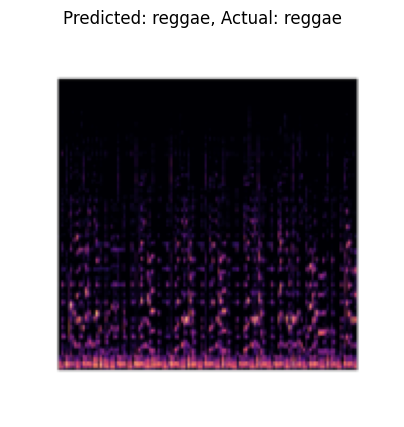

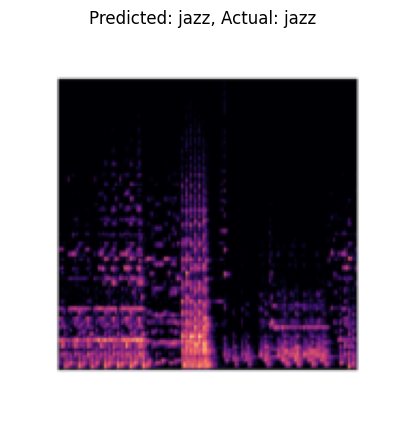

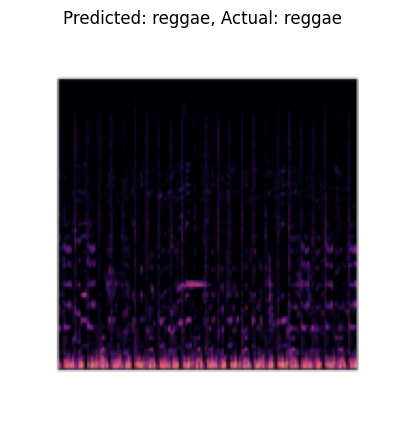

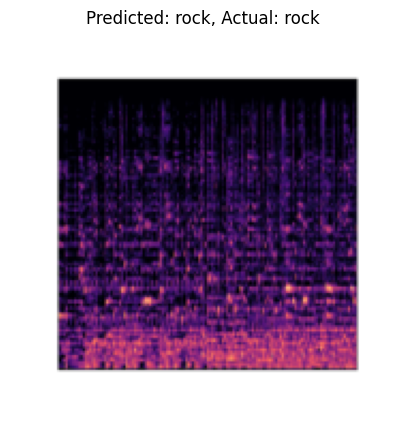

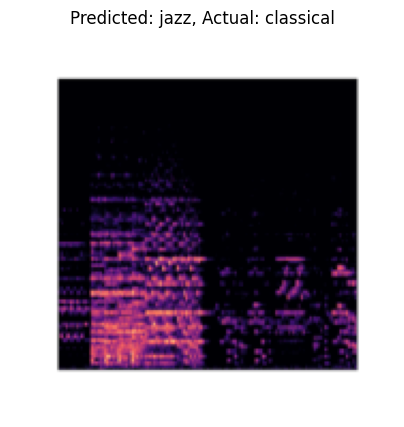

In [48]:
# Visualize some predictions along with their ground truth labels
num_images_to_visualize = 5
for i in range(num_images_to_visualize):
    plt.figure(figsize=(5, 5))
    plt.imshow(test_dataset[i][0].permute(1, 2, 0))  # Show image
    plt.title(f"Predicted: {class_names[all_predictions_100epochs[i]]}, Actual: {class_names[all_targets_100epochs[i]]}")
    plt.axis('off')
    plt.show()

## 2. The convolutional network (shown in Figure 1 with your own choice of parameters)

### Class Net 2

Net2 defines a convolutional neural network (CNN) model using PyTorch's nn.Module class. Let's break down the code:

Initialization:
The '__init__' method initializes the layers of the neural network.
* It takes parameters such as the number of input channels (in_channels), output channels for each convolutional layer (conv1_output_channels, conv2_output_channels, conv3_output_channels, conv4_output_channels), kernel size for max-pooling (maxpool_kernel_size), number of output features for the first fully connected layer (fc1_output_features), and the number of classes (num_classes).
* Convolutional layers (conv1, conv2, conv3, conv4) are defined with specified input and output channels and kernel sizes.
* Max-pooling layers (maxpool1, maxpool2) are defined with specified kernel size and stride.
* The input size for the first fully connected layer (fc1) is calculated based on the output size of the last convolutional layer (conv4_output_channels) and the resulting spatial dimensions after max-pooling.
* Fully connected layers (fc1, fc2) are defined with input and output sizes.

Forward Pass:
In the 'forward' method, the forward pass of the neural network is defined.
* Input 'x' is passed through the first convolutional layer (conv1) followed by ReLU activation.
* Similarly, it passes through the second convolutional layer (conv2) followed by ReLU activation.
* Then, max-pooling (maxpool1) is applied.
* After that, it goes through the third convolutional layer (conv3) followed by ReLU activation.
* And then through the fourth convolutional layer (conv4) followed by ReLU activation.
* Finally, another max-pooling (maxpool2) is applied.
* The output is flattened using 'view' to prepare it for the fully connected layers.
* The flattened output is passed through the first fully connected layer (fc1) followed by ReLU activation.
* The output of 'fc1' is passed through the second fully connected layer (fc2), which produces the final output logits for classification.

Overall, this architecture consists of four convolutional layers with ReLU activations, interspersed with max-pooling layers, followed by two fully connected layers for classification.

In [16]:
class Net2(nn.Module):
    def __init__(self, in_channels, conv1_output_channels, conv2_output_channels,
                 conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                 fc1_output_features, num_classes):
        super(Net2, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels, conv1_output_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(conv1_output_channels, conv2_output_channels, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(conv2_output_channels, conv3_output_channels, kernel_size=3, padding=1)  
        self.conv4 = nn.Conv2d(conv3_output_channels, conv4_output_channels, kernel_size=3, padding=1)  
        # Maxpool layers
        self.maxpool1 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        
        # Calculate input size for fc1
        input_size_fc1 = conv4_output_channels * 45 * 45 
        
        # Fully connected layers
        self.fc1 = nn.Linear(input_size_fc1, fc1_output_features)
        self.fc2 = nn.Linear(fc1_output_features, num_classes)

    def forward(self, x):
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        # Maxpool1
        x = self.maxpool1(x)
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # Maxpool2
        x = self.maxpool2(x)
        # Flatten the output
        x = x.view(x.size(0), -1)
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Now define the model parameters and print them.


In [17]:
input_channels = 3
conv1_output_channels = 16
conv2_output_channels = 32
conv3_output_channels = 64
conv4_output_channels = 128
kernel_size = 3
padding = 1
maxpool_kernel_size = 2
stride = 2
fc1_output_features = 128
fc2_output_features = 256
num_classes = 10

In [18]:
print("Model Parameters:")
print("Input Channels:", input_channels)
print("Conv1 Output Channels:", conv1_output_channels)
print("Conv2 Output Channels:", conv2_output_channels)
print("Conv3 Output Channels:", conv3_output_channels)
print("Conv4 Output Channels:", conv4_output_channels)
print("Kernel Size:", kernel_size)
print("Padding:", padding)
print("Maxpool Kernel Size:", maxpool_kernel_size)
print("Stride:", stride)
print("FC1 Output Features:", fc1_output_features)
print("FC2 Output Features:", fc2_output_features)
print("Number of Classes:", num_classes)

Model Parameters:
Input Channels: 3
Conv1 Output Channels: 16
Conv2 Output Channels: 32
Conv3 Output Channels: 64
Conv4 Output Channels: 128
Kernel Size: 3
Padding: 1
Maxpool Kernel Size: 2
Stride: 2
FC1 Output Features: 128
FC2 Output Features: 256
Number of Classes: 10


#### Training the model: 
Train the model for '50 epochs' and '100 epochs' separately. 

In [19]:
# Train Net2 for 50 epochs
net2_50epochs = Net2(input_channels, conv1_output_channels, conv2_output_channels,
                     conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                     fc1_output_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net2_50epochs.parameters(), lr=0.001)  # Define the optimizer
train_model(net2_50epochs, criterion, optimizer, train_loader, num_epochs=50)

Epoch [1/50], Loss: 2.4146
Epoch [2/50], Loss: 2.1261
Epoch [3/50], Loss: 2.0083
Epoch [4/50], Loss: 1.9150
Epoch [5/50], Loss: 1.7945
Epoch [6/50], Loss: 1.7296
Epoch [7/50], Loss: 1.6683
Epoch [8/50], Loss: 1.5184
Epoch [9/50], Loss: 1.3418
Epoch [10/50], Loss: 1.2431
Epoch [11/50], Loss: 1.1051
Epoch [12/50], Loss: 0.8881
Epoch [13/50], Loss: 0.8704
Epoch [14/50], Loss: 0.5965
Epoch [15/50], Loss: 0.5015
Epoch [16/50], Loss: 0.5491
Epoch [17/50], Loss: 0.3240
Epoch [18/50], Loss: 0.3085
Epoch [19/50], Loss: 0.1612
Epoch [20/50], Loss: 0.0742
Epoch [21/50], Loss: 0.0704
Epoch [22/50], Loss: 0.0432
Epoch [23/50], Loss: 0.0484
Epoch [24/50], Loss: 0.0564
Epoch [25/50], Loss: 0.0440
Epoch [26/50], Loss: 0.0402
Epoch [27/50], Loss: 0.0260
Epoch [28/50], Loss: 0.0138
Epoch [29/50], Loss: 0.0269
Epoch [30/50], Loss: 0.0156
Epoch [31/50], Loss: 0.0256
Epoch [32/50], Loss: 0.0223
Epoch [33/50], Loss: 0.0268
Epoch [34/50], Loss: 0.0197
Epoch [35/50], Loss: 0.0482
Epoch [36/50], Loss: 0.0270
E

In [21]:
# Train Net2 for 100 epochs
net2_100epochs = Net2(input_channels, conv1_output_channels, conv2_output_channels,
                     conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                     fc1_output_features, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net2_100epochs.parameters(), lr=0.001)
train_model(net2_100epochs, criterion, optimizer, train_loader, num_epochs=100)

Epoch [1/100], Loss: 2.4740
Epoch [2/100], Loss: 2.2764
Epoch [3/100], Loss: 2.1083
Epoch [4/100], Loss: 2.0077
Epoch [5/100], Loss: 1.9547
Epoch [6/100], Loss: 1.8841
Epoch [7/100], Loss: 1.7997
Epoch [8/100], Loss: 1.7376
Epoch [9/100], Loss: 1.6981
Epoch [10/100], Loss: 1.6256
Epoch [11/100], Loss: 1.5471
Epoch [12/100], Loss: 1.4724
Epoch [13/100], Loss: 1.4068
Epoch [14/100], Loss: 1.3592
Epoch [15/100], Loss: 1.3048
Epoch [16/100], Loss: 1.2543
Epoch [17/100], Loss: 1.1884
Epoch [18/100], Loss: 1.1142
Epoch [19/100], Loss: 1.0116
Epoch [20/100], Loss: 0.9971
Epoch [21/100], Loss: 0.8285
Epoch [22/100], Loss: 0.8446
Epoch [23/100], Loss: 0.7068
Epoch [24/100], Loss: 0.5863
Epoch [25/100], Loss: 0.4806
Epoch [26/100], Loss: 0.4197
Epoch [27/100], Loss: 0.3624
Epoch [28/100], Loss: 0.3902
Epoch [29/100], Loss: 0.2338
Epoch [30/100], Loss: 0.1747
Epoch [31/100], Loss: 0.0747
Epoch [32/100], Loss: 0.0598
Epoch [33/100], Loss: 0.0710
Epoch [34/100], Loss: 0.0823
Epoch [35/100], Loss: 0

#### Evaluation on Training set
Calculate the accuracy of Net2 on the training set after 50 epochs and 100 epochs.

In [22]:
# Evaluate Net2 on the training set after 50 epochs
train_accuracy_50epochs_net2 = evaluate_model(net2_50epochs, train_loader)
print(f"Training Accuracy after 50 epochs: {train_accuracy_50epochs_net2:.4f}")

Training Accuracy after 50 epochs: 0.9986


In [23]:
# Evaluate Net2 on the training set after 100 epochs
train_accuracy_100epochs_net2 = evaluate_model(net2_100epochs, train_loader)
print(f"Training Accuracy after 100 epochs: {train_accuracy_100epochs_net2:.4f}")

Training Accuracy after 100 epochs: 0.9986


#### Validation
Validate Net2 Model by calculating the accuracy of the model on the validation set.

In [24]:
# Evaluate Net2 on the validation set after 50 epochs
val_accuracy_50epochs_net2 = evaluate_model(net2_50epochs, val_loader)
print(f"Validation Accuracy after 50 epochs: {val_accuracy_50epochs_net2:.4f}")

Validation Accuracy after 50 epochs: 0.4724


In [25]:
# Evaluate Net2 on the validation set after 100 epochs
val_accuracy_100epochs_net2 = evaluate_model(net2_100epochs, val_loader)
print(f"Validation Accuracy after 100 epochs: {val_accuracy_100epochs_net2:.4f}")

Validation Accuracy after 100 epochs: 0.4372


#### Testing
Test the Net2 Model on the test dataset.

In [26]:
# Evaluate Net2 on the test set
test_accuracy_50epochs_net2 = evaluate_model(net2_50epochs, test_loader)
print(f"Test Accuracy after 50 epochs: {test_accuracy_50epochs_net2:.4f}")

Test Accuracy after 50 epochs: 0.5050


In [27]:
# Evaluate Net2 on the test set
test_accuracy_100epochs_net2 = evaluate_model(net2_100epochs, test_loader)
print(f"Test Accuracy after 100 epochs: {test_accuracy_100epochs_net2:.4f}")

Test Accuracy after 100 epochs: 0.4257


#### Evaluation of all the results of Net2
##### 1. Create Confusion Matrix
Plot a Confusion matrix for 50 epochs and 100 epoch.


In [28]:
all_predictions_net2_50epochs, all_targets_net2_50epochs = get_all_predictions(net2_50epochs, test_loader)
all_predictions_net2_100epochs, all_targets_net2_100epochs = get_all_predictions(net2_100epochs, test_loader)

In [29]:
cm_net2_50epochs = confusion_matrix(all_targets_net2_50epochs, all_predictions_net2_50epochs)
cm_net2_100epochs = confusion_matrix(all_targets_net2_100epochs, all_predictions_net2_100epochs)

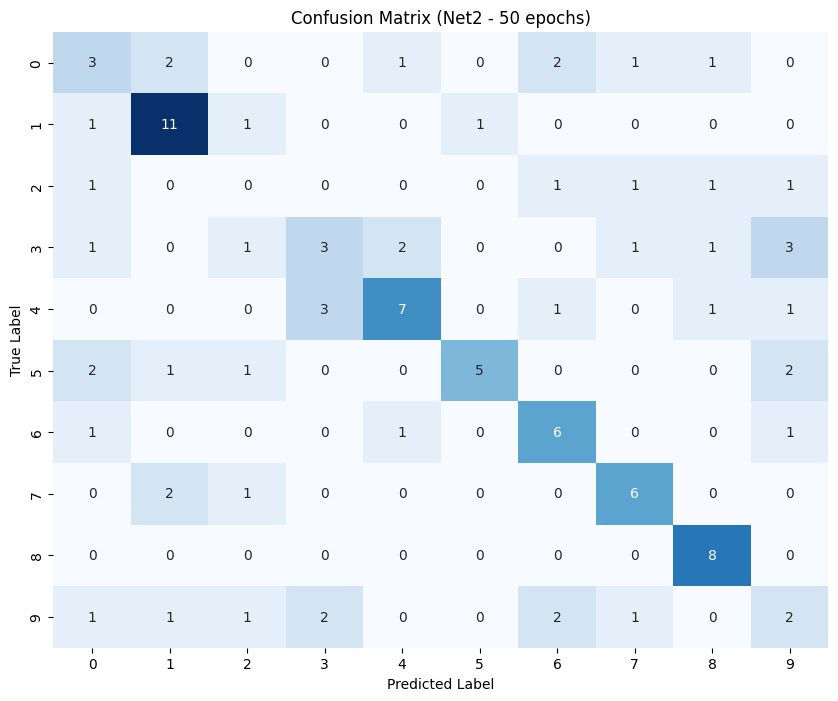

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net2_50epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net2 - 50 epochs)')
plt.show()

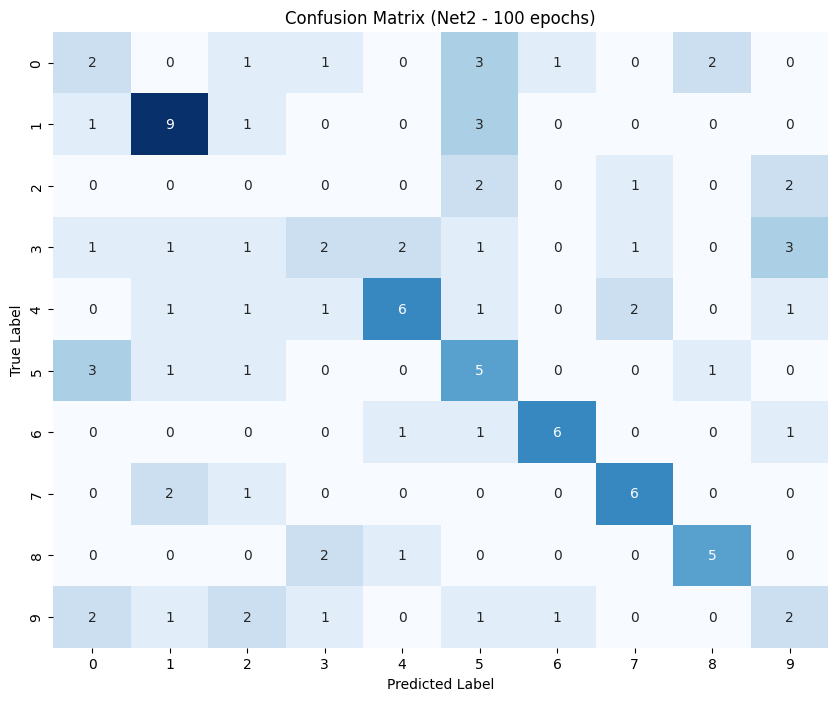

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net2_100epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net2 - 100 epochs)')
plt.show()


##### 2. Generate the Classification report
It provides detailed evaluation metrics for each class in a multi-class classification problem for 50 and 100 epoch.


In [32]:
report_net2_50epochs = classification_report(all_targets_net2_50epochs, all_predictions_net2_50epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net2 - 50 epochs):")
print(report_net2_50epochs)

Classification Report (Net2 - 50 epochs):
              precision    recall  f1-score   support

       blues       0.30      0.30      0.30        10
   classical       0.65      0.79      0.71        14
     country       0.00      0.00      1.00         5
       disco       0.38      0.25      0.30        12
      hiphop       0.64      0.54      0.58        13
        jazz       0.83      0.45      0.59        11
       metal       0.50      0.67      0.57         9
         pop       0.60      0.67      0.63         9
      reggae       0.67      1.00      0.80         8
        rock       0.20      0.20      0.20        10

    accuracy                           0.50       101
   macro avg       0.48      0.49      0.57       101
weighted avg       0.51      0.50      0.54       101



In [33]:
report_net2_100epochs = classification_report(all_targets_net2_100epochs, all_predictions_net2_100epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net2 - 100 epochs):")
print(report_net2_100epochs)

Classification Report (Net2 - 100 epochs):
              precision    recall  f1-score   support

       blues       0.22      0.20      0.21        10
   classical       0.60      0.64      0.62        14
     country       0.00      0.00      1.00         5
       disco       0.29      0.17      0.21        12
      hiphop       0.60      0.46      0.52        13
        jazz       0.29      0.45      0.36        11
       metal       0.75      0.67      0.71         9
         pop       0.60      0.67      0.63         9
      reggae       0.62      0.62      0.62         8
        rock       0.22      0.20      0.21        10

    accuracy                           0.43       101
   macro avg       0.42      0.41      0.51       101
weighted avg       0.44      0.43      0.48       101




##### 3. Calculate the Precision, Recall and F1-score
For each class, Calculate the Precision Recall and F1-score for 100 epochs. Also calculate the overall metric.


In [34]:
precision_per_class_net2_100epochs = precision_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average=None)
recall_per_class_net2_100epochs = recall_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average=None)
f1_per_class_net2_100epochs = f1_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average=None)

In [35]:
# Create a dictionary to store class-wise evaluation metrics
class_metrics_net2 = {
    "Class": class_names,
    "Precision": precision_per_class_net2_100epochs,
    "Recall": recall_per_class_net2_100epochs,
    "F1-score": f1_per_class_net2_100epochs
}

# Print class-wise evaluation metrics
class_metrics_df = pd.DataFrame(class_metrics_net2)
print(class_metrics_df)

       Class  Precision    Recall  F1-score
0      blues   0.222222  0.200000  0.210526
1  classical   0.600000  0.642857  0.620690
2    country   0.000000  0.000000  0.000000
3      disco   0.285714  0.166667  0.210526
4     hiphop   0.600000  0.461538  0.521739
5       jazz   0.294118  0.454545  0.357143
6      metal   0.750000  0.666667  0.705882
7        pop   0.600000  0.666667  0.631579
8     reggae   0.625000  0.625000  0.625000
9       rock   0.222222  0.200000  0.210526


In [37]:
# Calculate overall precision, recall, and F1-score
overall_precision_net2 = precision_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average='weighted')
overall_recall_net2 = recall_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average='weighted')
overall_f1_net2 = f1_score(all_targets_net2_100epochs, all_predictions_net2_100epochs, average='weighted')

# Print overall evaluation metrics
print("Overall Precision:", overall_precision_net2)
print("Overall Recall:", overall_recall_net2)
print("Overall F1-score:", overall_f1_net2)

Overall Precision: 0.4401812870362667
Overall Recall: 0.42574257425742573
Overall F1-score: 0.4274735554919499



##### 4. Plot the Precision-Recall curve
For each class, Plot the Precision-Recall curve for 100 epoch.


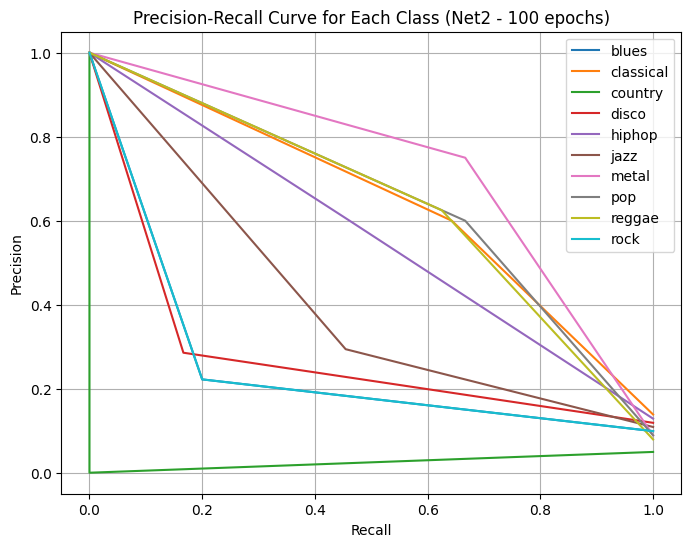

In [38]:
precision_per_class_curve = []
recall_per_class_curve = []

# Iterate over each class
for i in range(num_classes):
    y_true_class = [1 if label == i else 0 for label in all_targets_net2_100epochs]
    y_score_class = [1 if label == i else 0 for label in all_predictions_net2_100epochs]
    # Compute precision and recall for the current class
    precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)
    precision_per_class_curve.append(precision)
    recall_per_class_curve.append(recall)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    class_name = class_names[i] 
    plt.plot(recall_per_class_curve[i], precision_per_class_curve[i], label=f'{class_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (Net2 - 100 epochs)')
plt.legend()
plt.grid(True)
plt.show()


##### 5. Calculate the area under the Precision-Recall curve.
For each class, Calculate the area under the Precision-Recall curve for 100 epochs.

In [39]:
auc_per_class = []

for i in range(num_classes):
    # Calculate AUC for the Precision-Recall curve of the current class
    auc_class = auc(recall_per_class_curve[i], precision_per_class_curve[i])
    auc_per_class.append(auc_class)

for i, class_name in enumerate(class_names):
    print(f"AUC for {class_name}: {auc_per_class[i]}")

AUC for blues: 0.2507150715071507
AUC for classical: 0.6461810466760962
AUC for country: 0.024752475247524754
AUC for disco: 0.2756954266855257
AUC for hiphop: 0.5654226961157655
AUC for jazz: 0.4040345210991687
AUC for metal: 0.7231848184818481
AUC for pop: 0.6481848184818482
AUC for reggae: 0.6398514851485149
AUC for rock: 0.2507150715071507



##### 6. Calculate class-wise accuracy.
For each class, Calculate class-wise accuracy for 100 epochs.

In [44]:
# Calculate class-wise accuracy for Net2
classwise_accuracy_net2 = calculate_classwise_accuracy(net2_100epochs, test_loader, num_classes)
for i in range(num_classes):
    print(f"Class name: {class_names[i]}, Accuracy: {classwise_accuracy_net2[i]}")

Class name: blues, Accuracy: 0.2
Class name: classical, Accuracy: 0.6428571428571429
Class name: country, Accuracy: 0.0
Class name: disco, Accuracy: 0.16666666666666666
Class name: hiphop, Accuracy: 0.46153846153846156
Class name: jazz, Accuracy: 0.45454545454545453
Class name: metal, Accuracy: 0.6666666666666666
Class name: pop, Accuracy: 0.6666666666666666
Class name: reggae, Accuracy: 0.625
Class name: rock, Accuracy: 0.2



##### 7. Visualize some predictions along with their ground truth labels
We iterate through a few sample images from the test dataset, displaying each image alongside its predicted and actual class labels. 
It helps visually assess the model's performance by comparing its predictions with the ground truth labels.

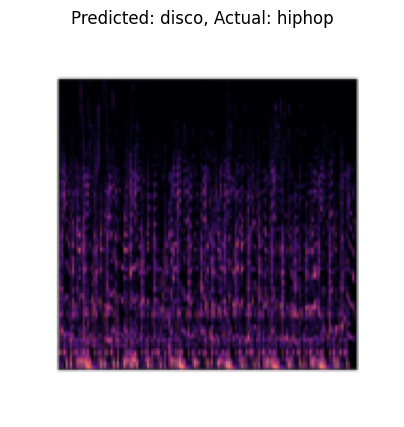

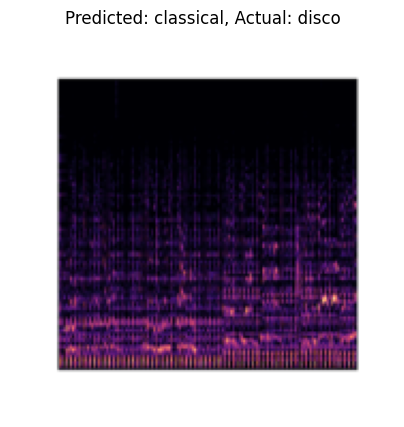

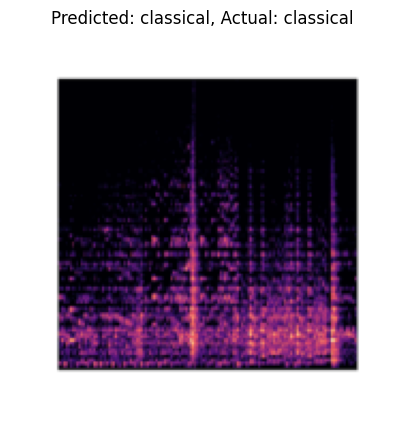

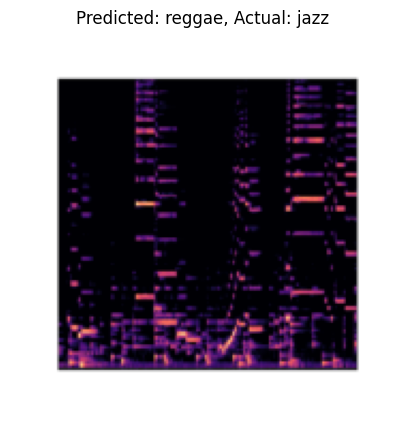

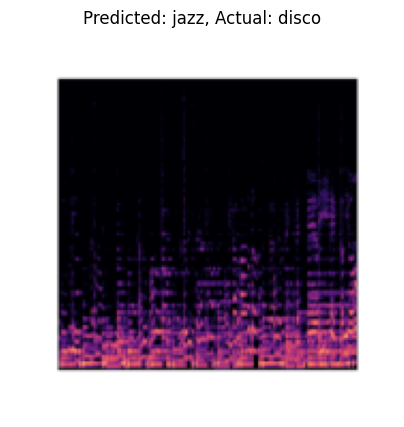

In [45]:
num_images_to_visualize = 5
for i in range(num_images_to_visualize):
    plt.figure(figsize=(5, 5))
    image, label = test_dataset[i]
    image = image.unsqueeze(0).to(device)
    output = net2_100epochs(image)
    _, predicted = torch.max(output, 1)
    predicted_class = class_names[predicted.item()]
    actual_class = class_names[label]
    plt.imshow(image.squeeze().permute(1, 2, 0).cpu())
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()

## 3. A convolutional network obtained by modifying Net2 by adding a batch
## normalisation layer.

With an additional Batch Normalization layer positioned between the second max-pooling layer (maxpool2) and the fourth convolutional layer (conv4), Net3 is an adaption of Net2. This layer normalizes each layer's input, which aids in stabilizing and speeding up the training of deep neural networks. The model's convergence speed and overall performance are improved with the addition of Batch Normalization.

In [18]:
class Net3(nn.Module):
    def __init__(self, input_channels, conv1_output_channels, conv2_output_channels,
                 conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                 fc1_input_features, num_classes):
        super(Net3, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(input_channels, conv1_output_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(conv1_output_channels, conv2_output_channels, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(conv2_output_channels, conv3_output_channels, kernel_size=3, padding=1)  
        self.conv4 = nn.Conv2d(conv3_output_channels, conv4_output_channels, kernel_size=3, padding=1)  
        # Batch normalization layer
        self.batchnorm = nn.BatchNorm2d(conv4_output_channels)
        # Maxpool layers
        self.maxpool1 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        # Fully connected layers
        input_size_fc1 = conv4_output_channels * 45 * 45
        
        self.fc1 = nn.Linear(input_size_fc1, fc1_output_features)
        self.fc2 = nn.Linear(fc1_output_features, num_classes)
        

    def forward(self, x):
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        # Maxpool1
        x = self.maxpool1(x)
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # Batch normalization
        x = self.batchnorm(x)
        # Maxpool2
        x = self.maxpool2(x)
        # Flatten the output
        x = x.view(x.size(0), -1)
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Now define the model parameters and print them.

In [19]:
input_channels = 3
conv1_output_channels = 16
conv2_output_channels = 32
conv3_output_channels = 64
conv4_output_channels = 128
maxpool_kernel_size = 2
fc1_output_features = 256
num_classes = 10

In [20]:
print("Model Parameters:")
print(f"Input Channels: {input_channels}")
print(f"Conv1 Output Channels: {conv1_output_channels}")
print(f"Conv2 Output Channels: {conv2_output_channels}")
print(f"Conv3 Output Channels: {conv3_output_channels}")
print(f"Conv4 Output Channels: {conv4_output_channels}")
print(f"Kernel Size: 3")
print(f"Padding: 1")
print(f"Maxpool Kernel Size: {maxpool_kernel_size}")
print(f"Stride: 2")
print(f"FC1 Input Features: {conv4_output_channels}")
print(f"Number of Classes: {num_classes}")

Model Parameters:
Input Channels: 3
Conv1 Output Channels: 16
Conv2 Output Channels: 32
Conv3 Output Channels: 64
Conv4 Output Channels: 128
Kernel Size: 3
Padding: 1
Maxpool Kernel Size: 2
Stride: 2
FC1 Input Features: 128
Number of Classes: 10


#### Training the model: 
Train the model for '50 epochs' and '100 epochs' separately. 

In [21]:
# Train Net3 for 50 epochs
net3_50epochs = Net3(input_channels, conv1_output_channels, conv2_output_channels,
                     conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                     fc1_output_features, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net3_50epochs.parameters(), lr=0.001)
train_model(net3_50epochs, criterion, optimizer, train_loader, num_epochs=50)

Epoch [1/50], Loss: 30.2016
Epoch [2/50], Loss: 2.7125
Epoch [3/50], Loss: 2.1765
Epoch [4/50], Loss: 2.1659
Epoch [5/50], Loss: 2.1444
Epoch [6/50], Loss: 2.1241
Epoch [7/50], Loss: 2.1400
Epoch [8/50], Loss: 2.1113
Epoch [9/50], Loss: 2.1172
Epoch [10/50], Loss: 2.1069
Epoch [11/50], Loss: 2.0633
Epoch [12/50], Loss: 2.0555
Epoch [13/50], Loss: 2.0431
Epoch [14/50], Loss: 2.0605
Epoch [15/50], Loss: 2.0779
Epoch [16/50], Loss: 2.0241
Epoch [17/50], Loss: 2.0155
Epoch [18/50], Loss: 2.0040
Epoch [19/50], Loss: 1.9526
Epoch [20/50], Loss: 1.9231
Epoch [21/50], Loss: 1.9203
Epoch [22/50], Loss: 1.8895
Epoch [23/50], Loss: 1.8060
Epoch [24/50], Loss: 1.8128
Epoch [25/50], Loss: 1.8917
Epoch [26/50], Loss: 1.8398
Epoch [27/50], Loss: 1.8453
Epoch [28/50], Loss: 1.8004
Epoch [29/50], Loss: 1.8171
Epoch [30/50], Loss: 1.7347
Epoch [31/50], Loss: 1.6712
Epoch [32/50], Loss: 1.6125
Epoch [33/50], Loss: 1.6893
Epoch [34/50], Loss: 1.6520
Epoch [35/50], Loss: 1.5384
Epoch [36/50], Loss: 1.4273


In [25]:
net3_100epochs = Net3(input_channels, conv1_output_channels, conv2_output_channels,
                     conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                     fc1_output_features, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net3_100epochs.parameters(), lr=0.001)  # Define the optimizer
train_model(net3_100epochs, criterion, optimizer, train_loader, num_epochs=100)

Epoch [1/100], Loss: 29.3531
Epoch [2/100], Loss: 8.7465
Epoch [3/100], Loss: 2.7041
Epoch [4/100], Loss: 2.0064
Epoch [5/100], Loss: 1.9673
Epoch [6/100], Loss: 1.9960
Epoch [7/100], Loss: 1.7840
Epoch [8/100], Loss: 1.6563
Epoch [9/100], Loss: 1.9346
Epoch [10/100], Loss: 1.4250
Epoch [11/100], Loss: 1.7855
Epoch [12/100], Loss: 1.5713
Epoch [13/100], Loss: 0.9873
Epoch [14/100], Loss: 1.0562
Epoch [15/100], Loss: 0.7849
Epoch [16/100], Loss: 0.5171
Epoch [17/100], Loss: 0.3292
Epoch [18/100], Loss: 0.2452
Epoch [19/100], Loss: 0.1386
Epoch [20/100], Loss: 0.2165
Epoch [21/100], Loss: 0.1095
Epoch [22/100], Loss: 0.0499
Epoch [23/100], Loss: 0.0282
Epoch [24/100], Loss: 0.0247
Epoch [25/100], Loss: 0.0216
Epoch [26/100], Loss: 0.0135
Epoch [27/100], Loss: 0.0098
Epoch [28/100], Loss: 0.0084
Epoch [29/100], Loss: 0.0072
Epoch [30/100], Loss: 0.0064
Epoch [31/100], Loss: 0.0058
Epoch [32/100], Loss: 0.0053
Epoch [33/100], Loss: 0.0050
Epoch [34/100], Loss: 0.0043
Epoch [35/100], Loss: 

#### Evaluation on Training set
Calculate the accuracy of Net3 on the training set after 50 epochs and 100 epochs.

In [22]:
# Evaluate Net3 on the training set after 50 epochs
train_accuracy_50epochs_net3 = evaluate_model(net3_50epochs, train_loader)
print(f"Training Accuracy after 50 epochs: {train_accuracy_50epochs_net3:.4f}")

Training Accuracy after 50 epochs: 0.8798


In [26]:
# Evaluate Net3 on the training set after 100 epochs
train_accuracy_100epochs_net3 = evaluate_model(net3_50epochs, train_loader)
print(f"Training Accuracy after 100 epochs: {train_accuracy_100epochs_net3:.4f}")

Training Accuracy after 100 epochs: 0.8798


#### Validation
Validate Net3 Model by calculating the accuracy of the model on the validation set.

In [23]:
# Evaluate Net3 on the validation set after 50 epochs
val_accuracy_50epochs_net3 = evaluate_model(net3_50epochs, val_loader)
print(f"Validation Accuracy after 50 epochs: {val_accuracy_50epochs_net3:.4f}")

Validation Accuracy after 50 epochs: 0.4523


In [27]:
# Evaluate Net3 on the validation set after 100 epochs
val_accuracy_100epochs_net3 = evaluate_model(net3_50epochs, val_loader)
print(f"Validation Accuracy after 100 epochs: {val_accuracy_100epochs_net3:.4f}")

Validation Accuracy after 100 epochs: 0.4523


#### Testing
Test the Net3 Model on the test dataset.

In [24]:
# Evaluate Net3 on the test set
test_accuracy_50epochs_net3 = evaluate_model(net3_50epochs, test_loader)
print(f"Test Accuracy after 50 epochs: {test_accuracy_50epochs_net3:.4f}")

Test Accuracy after 50 epochs: 0.5842


In [28]:
# Evaluate Net3 on the test set after 100 epochs
test_accuracy_100epochs_net3 = evaluate_model(net3_50epochs, test_loader)
print(f"Test Accuracy after 100 epochs: {test_accuracy_100epochs_net3:.4f}")

Test Accuracy after 100 epochs: 0.5842


#### Evaluation of all the results of Net3
##### 1. Create Confusion Matrix
Plot a Confusion matrix for 50 epochs and 100 epochs.

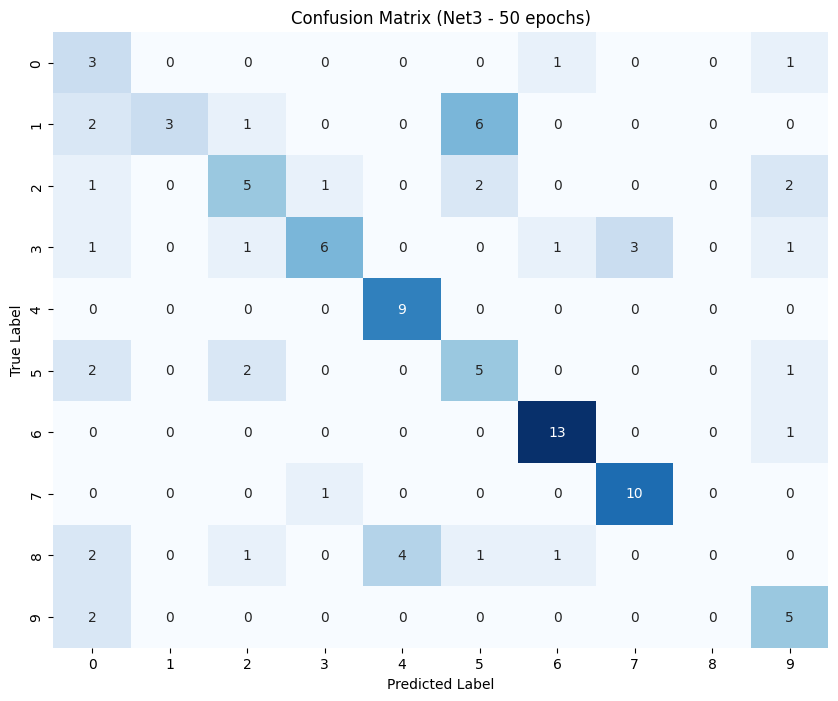

In [36]:
# Generate predictions for Net3 at epoch 50
all_predictions_net3_50epochs, all_targets_net3_50epochs = get_all_predictions(net3_50epochs, test_loader)

# Create confusion matrix for Net3 at epoch 50
cm_net3_50epochs = confusion_matrix(all_targets_net3_50epochs, all_predictions_net3_50epochs)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net3_50epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net3 - 50 epochs)')
plt.show()

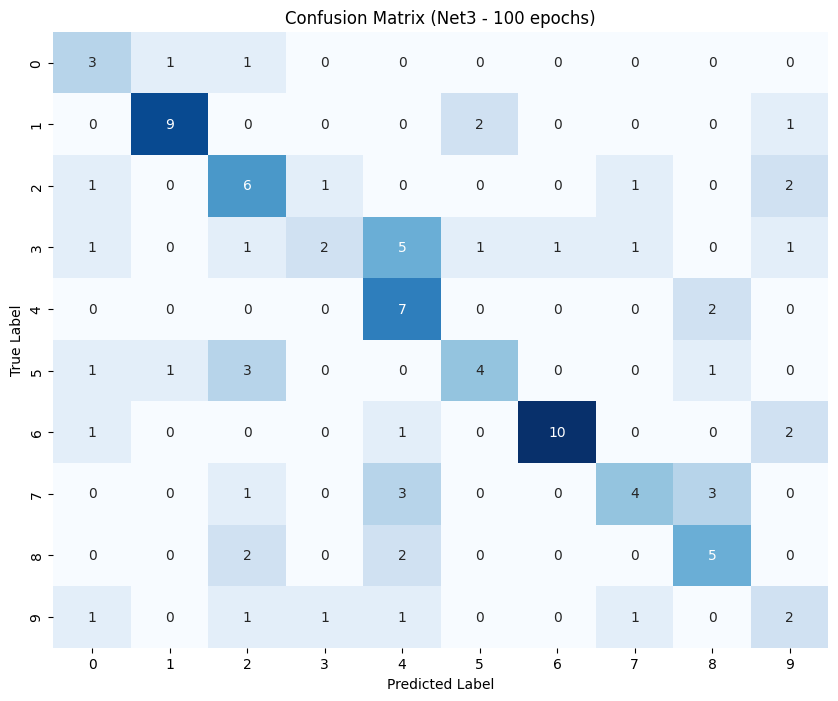

In [37]:
# Generate predictions for Net3 at epoch 100
all_predictions_net3_100epochs, all_targets_net3_100epochs = get_all_predictions(net3_100epochs, test_loader)

# Create confusion matrix for Net3 at epoch 100
cm_net3_100epochs = confusion_matrix(all_targets_net3_100epochs, all_predictions_net3_100epochs)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net3_100epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net3 - 100 epochs)')
plt.show()

##### 2. Generate the Classification report
It provides detailed evaluation metrics for each class in a multi-class classification problem for 50 and 100 epochs.

In [38]:
# Classification report for Net3 at epoch 50
report_net3_50epochs = classification_report(all_targets_net3_50epochs, all_predictions_net3_50epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net3 - 50 epochs):")
print(report_net3_50epochs)

Classification Report (Net3 - 50 epochs):
              precision    recall  f1-score   support

       blues       0.23      0.60      0.33         5
   classical       1.00      0.25      0.40        12
     country       0.50      0.45      0.48        11
       disco       0.75      0.46      0.57        13
      hiphop       0.69      1.00      0.82         9
        jazz       0.36      0.50      0.42        10
       metal       0.81      0.93      0.87        14
         pop       0.77      0.91      0.83        11
      reggae       1.00      0.00      0.00         9
        rock       0.45      0.71      0.56         7

    accuracy                           0.58       101
   macro avg       0.66      0.58      0.53       101
weighted avg       0.70      0.58      0.55       101



In [39]:
# Classification report for Net3 at epoch 100
report_net3_100epochs = classification_report(all_targets_net3_100epochs, all_predictions_net3_100epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net3 - 100 epochs):")
print(report_net3_100epochs)

Classification Report (Net3 - 100 epochs):
              precision    recall  f1-score   support

       blues       0.38      0.60      0.46         5
   classical       0.82      0.75      0.78        12
     country       0.40      0.55      0.46        11
       disco       0.50      0.15      0.24        13
      hiphop       0.37      0.78      0.50         9
        jazz       0.57      0.40      0.47        10
       metal       0.91      0.71      0.80        14
         pop       0.57      0.36      0.44        11
      reggae       0.45      0.56      0.50         9
        rock       0.25      0.29      0.27         7

    accuracy                           0.51       101
   macro avg       0.52      0.51      0.49       101
weighted avg       0.56      0.51      0.51       101



##### 3. Calculate the Precision, Recall and F1-score
For each class, Calculate the Precision Recall and F1-score for 100 epochs. Also calculate the overall metrics.

In [40]:
# Calculate precision, recall, and F1-score for each class
precision_per_class_net3_100epochs = precision_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average=None, zero_division=1)
recall_per_class_net3_100epochs = recall_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average=None, zero_division=1)
f1_per_class_net3_100epochs = f1_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average=None, zero_division=1)

In [41]:
# Create a dictionary to store class-wise evaluation metrics
class_metrics_net3 = {
    "Class": class_names,
    "Precision": precision_per_class_net3_100epochs,
    "Recall": recall_per_class_net3_100epochs,
    "F1-score": f1_per_class_net3_100epochs
}

# Print class-wise evaluation metrics
class_metrics_df = pd.DataFrame(class_metrics_net3)
print(class_metrics_df)

       Class  Precision    Recall  F1-score
0      blues   0.375000  0.600000  0.461538
1  classical   0.818182  0.750000  0.782609
2    country   0.400000  0.545455  0.461538
3      disco   0.500000  0.153846  0.235294
4     hiphop   0.368421  0.777778  0.500000
5       jazz   0.571429  0.400000  0.470588
6      metal   0.909091  0.714286  0.800000
7        pop   0.571429  0.363636  0.444444
8     reggae   0.454545  0.555556  0.500000
9       rock   0.250000  0.285714  0.266667


In [43]:
# Calculate overall precision, recall, and F1-score
overall_precision_net3 = precision_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average='weighted')
overall_recall_net3 = recall_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average='weighted')
overall_f1_net3 = f1_score(all_targets_net3_100epochs, all_predictions_net3_100epochs, average='weighted')

# Print overall evaluation metrics
print("Overall Precision:", overall_precision_net3)
print("Overall Recall:", overall_recall_net3)
print("Overall F1-score:", overall_f1_net3)

Overall Precision: 0.55917973376285
Overall Recall: 0.5148514851485149
Overall F1-score: 0.5098631799044551


##### 4. Plot the Precision-Recall curve
For each class, Plot the Precision-Recall curve for 100 epochs.

In [44]:
precision_per_class_curve_net3 = []
recall_per_class_curve_net3 = []

# Iterate over each class
for i in range(num_classes):
    # Treat the current class as positive, and all other classes as negative
    y_true_class = [1 if label == i else 0 for label in all_targets_net3_100epochs]
    y_score_class = [1 if label == i else 0 for label in all_predictions_net3_100epochs]

    # Compute precision and recall for the current class
    precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)

    # Append precision and recall to the lists
    precision_per_class_curve_net3.append(precision)
    recall_per_class_curve_net3.append(recall)

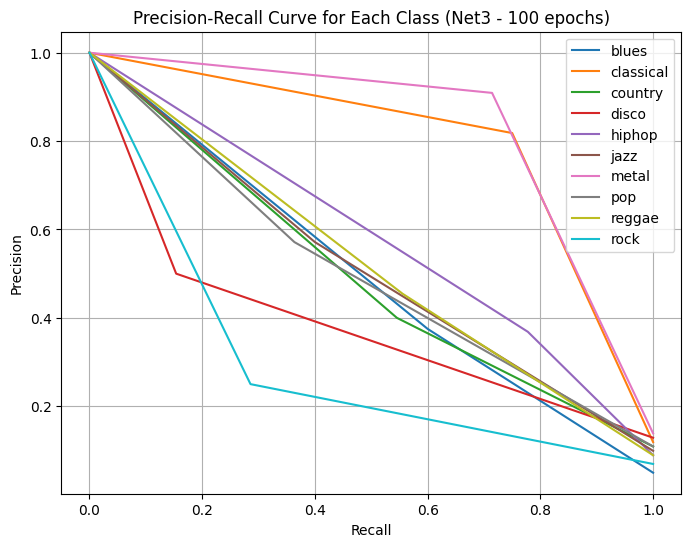

In [45]:
# Plot precision-recall curve for each class

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    class_name = class_names[i] 
    plt.plot(recall_per_class_curve_net3[i], precision_per_class_curve_net3[i], label=f'{class_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (Net3 - 100 epochs)')
plt.legend()
plt.grid(True)
plt.show()

##### 5. Calculate the area under the Precision-Recall curve.
For each class, Calculate the area under the Precision-Recall curve for 100 epochs.

In [47]:
auc_per_class = []

for i in range(num_classes):
    # Calculate AUC for the Precision-Recall curve of the current class
    auc_class = auc(recall_per_class_curve_net3[i], precision_per_class_curve_net3[i])
    auc_per_class.append(auc_class)

for i, class_name in enumerate(class_names):
    print(f"AUC for {class_name}: {auc_per_class[i]}")

AUC for blues: 0.4974009900990099
AUC for classical: 0.798942394239424
AUC for country: 0.49747974797479744
AUC for disco: 0.3813785224676314
AUC for hiphop: 0.5830004053036882
AUC for jazz: 0.5154172560113154
AUC for metal: 0.8314902918863315
AUC for pop: 0.5021859328790022
AUC for reggae: 0.5248524852485249
AUC for rock: 0.29260961810466757


##### 6. Calculate class-wise accuracy.
For each class, Calculate class-wise accuracy for 100 epochs.

In [48]:
# Calculate class-wise accuracy for Net3
classwise_accuracy_net3 = calculate_classwise_accuracy(net3_100epochs, test_loader, num_classes)
for i in range(num_classes):
    print(f"Class name: {class_names[i]}, Accuracy: {classwise_accuracy_net3[i]}")

Class name: blues, Accuracy: 0.6
Class name: classical, Accuracy: 0.75
Class name: country, Accuracy: 0.5454545454545454
Class name: disco, Accuracy: 0.15384615384615385
Class name: hiphop, Accuracy: 0.7777777777777778
Class name: jazz, Accuracy: 0.4
Class name: metal, Accuracy: 0.7142857142857143
Class name: pop, Accuracy: 0.36363636363636365
Class name: reggae, Accuracy: 0.5555555555555556
Class name: rock, Accuracy: 0.2857142857142857


##### 7. Visualize some predictions along with their ground truth labels
We iterate through a few sample images from the test dataset, displaying each image alongside its predicted and actual class labels. 
It helps visually assess the model's performance by comparing its predictions with the ground truth labels.

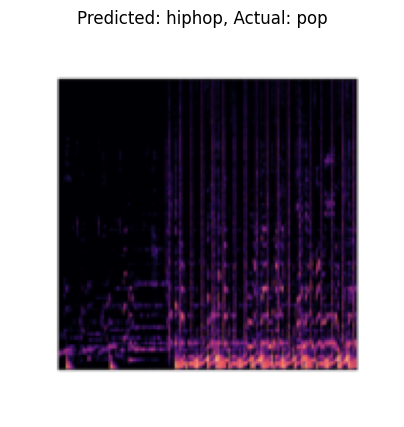

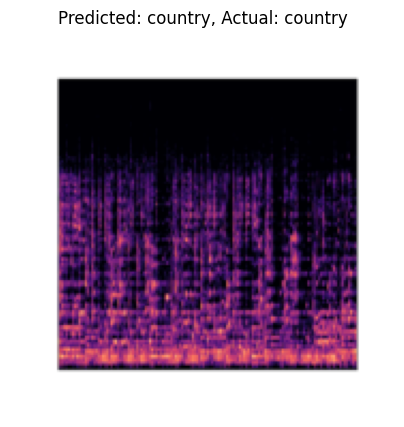

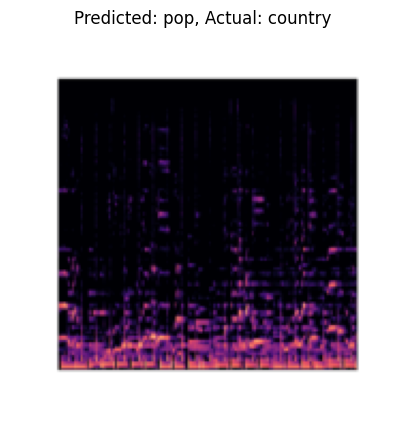

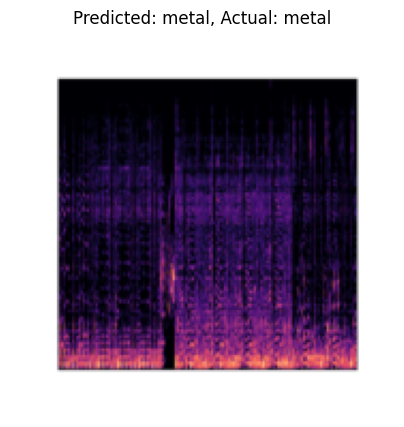

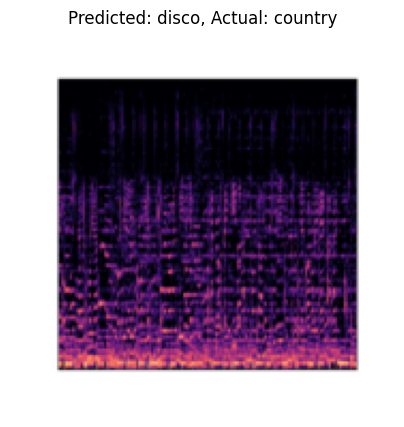

In [49]:
num_images_to_visualize = 5

for i in range(num_images_to_visualize):
    plt.figure(figsize=(5, 5))
    image, label = test_dataset[i]
    image = image.unsqueeze(0).to(device)
    output = net3_100epochs(image)
    _, predicted = torch.max(output, 1)
    predicted_class = class_names[predicted.item()]
    actual_class = class_names[label]
    plt.imshow(image.squeeze().permute(1, 2, 0).cpu())
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()

## 4. The same architecture as Net 3, with the RMSProp optimiser.

The optimization approach that is employed during training is what separates Net3 from Net4. Net3 makes use of the Adam optimizer, but Net4 chooses the RMSprop optimizer. The model's parameters are updated differently as a result of this decision, which might influence convergence speed and overall performance.

In [17]:
class Net4(nn.Module):
    def __init__(self, in_channels, conv1_output_channels, conv2_output_channels,
                 conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                 fc1_output_features, num_classes):
        super(Net4, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels, conv1_output_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(conv1_output_channels, conv2_output_channels, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(conv2_output_channels, conv3_output_channels, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(conv3_output_channels, conv4_output_channels, kernel_size=3, padding=1)
        # Batch normalization layer
        self.batchnorm = nn.BatchNorm2d(conv4_output_channels)
        # Maxpool layers
        self.maxpool1 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        self.maxpool2 = nn.MaxPool2d(kernel_size=maxpool_kernel_size, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(conv4_output_channels * 45 * 45, fc1_output_features)
        self.fc2 = nn.Linear(fc1_output_features, num_classes)

    def forward(self, x):
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        # Maxpool1
        x = self.maxpool1(x)
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        # Batch normalization
        x = self.batchnorm(x)
        # Maxpool2
        x = self.maxpool2(x)
        # Flatten the output
        x = x.view(x.size(0), -1)
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Now define the model parameters and print them.

In [18]:
input_channels = 3
conv1_output_channels = 16
conv2_output_channels = 32
conv3_output_channels = 64
conv4_output_channels = 128
maxpool_kernel_size = 2
fc1_input_features = 128 * 5 * 5  # Calculated based on the output shape after the convolutional layers
num_classes = 10
fc1_output_features = 256

In [19]:
# Print the model parameters
print("Model Parameters:")
print(f"Input Channels: {input_channels}")
print(f"Conv1 Output Channels: {conv1_output_channels}")
print(f"Conv2 Output Channels: {conv2_output_channels}")
print(f"Conv3 Output Channels: {conv3_output_channels}")
print(f"Conv4 Output Channels: {conv4_output_channels}")
print(f"Maxpool Kernel Size: {maxpool_kernel_size}")
print(f"FC1 Input Features: {fc1_input_features}")
print(f"FC1 Output Features:", fc1_output_features)
print(f"Number of Classes: {num_classes}")

Model Parameters:
Input Channels: 3
Conv1 Output Channels: 16
Conv2 Output Channels: 32
Conv3 Output Channels: 64
Conv4 Output Channels: 128
Maxpool Kernel Size: 2
FC1 Input Features: 3200
FC1 Output Features: 256
Number of Classes: 10


#### Training the model: 
Train the model for '50 epochs' and '100 epochs' separately. 

In [30]:
net4_50epochs = Net4(input_channels, conv1_output_channels, conv2_output_channels,
                      conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                      fc1_output_features, num_classes).to(device)
# Define criterion and optimizer- RMSProp
# Train for 50 epochs
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(net4_50epochs.parameters(), lr=0.001)
train_model(net4_50epochs, criterion, optimizer, train_loader, num_epochs=50)

Epoch [1/50], Loss: 253.0060
Epoch [2/50], Loss: 2.2156
Epoch [3/50], Loss: 2.2330
Epoch [4/50], Loss: 2.1915
Epoch [5/50], Loss: 2.2113
Epoch [6/50], Loss: 2.1957
Epoch [7/50], Loss: 2.1770
Epoch [8/50], Loss: 2.1592
Epoch [9/50], Loss: 2.1735
Epoch [10/50], Loss: 2.1902
Epoch [11/50], Loss: 2.2012
Epoch [12/50], Loss: 2.1707
Epoch [13/50], Loss: 2.1881
Epoch [14/50], Loss: 2.1555
Epoch [15/50], Loss: 2.1422
Epoch [16/50], Loss: 2.1362
Epoch [17/50], Loss: 2.1297
Epoch [18/50], Loss: 2.1799
Epoch [19/50], Loss: 2.1359
Epoch [20/50], Loss: 2.1748
Epoch [21/50], Loss: 2.1207
Epoch [22/50], Loss: 2.0969
Epoch [23/50], Loss: 2.1004
Epoch [24/50], Loss: 2.1402
Epoch [25/50], Loss: 2.1031
Epoch [26/50], Loss: 2.1627
Epoch [27/50], Loss: 2.0958
Epoch [28/50], Loss: 2.0874
Epoch [29/50], Loss: 34.8231
Epoch [30/50], Loss: 6.8677
Epoch [31/50], Loss: 2.2173
Epoch [32/50], Loss: 2.1170
Epoch [33/50], Loss: 2.1036
Epoch [34/50], Loss: 2.0906
Epoch [35/50], Loss: 2.0898
Epoch [36/50], Loss: 2.086

In [31]:
net4_100epochs = Net4(input_channels, conv1_output_channels, conv2_output_channels,
                      conv3_output_channels, conv4_output_channels, maxpool_kernel_size,
                      fc1_output_features, num_classes).to(device)

# Define criterion and optimizer
# Train for 100 epochs
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(net4_100epochs.parameters(), lr=0.001)  # Define the optimizer- RMSProp
train_model(net4_100epochs, criterion, optimizer, train_loader, num_epochs=100)

Epoch [1/100], Loss: 292.6409
Epoch [2/100], Loss: 14.8310
Epoch [3/100], Loss: 2.2427
Epoch [4/100], Loss: 2.2317
Epoch [5/100], Loss: 2.2253
Epoch [6/100], Loss: 2.1954
Epoch [7/100], Loss: 2.2247
Epoch [8/100], Loss: 2.2014
Epoch [9/100], Loss: 2.1841
Epoch [10/100], Loss: 2.1947
Epoch [11/100], Loss: 2.2260
Epoch [12/100], Loss: 2.2248
Epoch [13/100], Loss: 2.2071
Epoch [14/100], Loss: 2.1911
Epoch [15/100], Loss: 2.2024
Epoch [16/100], Loss: 2.1951
Epoch [17/100], Loss: 2.2108
Epoch [18/100], Loss: 2.1780
Epoch [19/100], Loss: 2.1733
Epoch [20/100], Loss: 2.1610
Epoch [21/100], Loss: 2.1618
Epoch [22/100], Loss: 2.1705
Epoch [23/100], Loss: 2.1708
Epoch [24/100], Loss: 2.2013
Epoch [25/100], Loss: 2.1455
Epoch [26/100], Loss: 2.1455
Epoch [27/100], Loss: 2.1628
Epoch [28/100], Loss: 2.1762
Epoch [29/100], Loss: 2.1357
Epoch [30/100], Loss: 2.4714
Epoch [31/100], Loss: 2.3064
Epoch [32/100], Loss: 2.3062
Epoch [33/100], Loss: 2.3059
Epoch [34/100], Loss: 2.3057
Epoch [35/100], Loss

#### Evaluation on Training set
Calculate the accuracy of Net4 on the training set after 50 epochs and 100 epochs.

In [32]:
# Evaluate Net4 on the training set after 50 epochs
train_accuracy_50epochs_net4 = evaluate_model(net4_50epochs, train_loader)
print(f"Training Accuracy after 50 epochs: {train_accuracy_50epochs_net4:.4f}")

Training Accuracy after 50 epochs: 0.2046


In [33]:
# Evaluate Net4 on the training set after 100 epochs
train_accuracy_100epochs_net4 = evaluate_model(net4_100epochs, train_loader)
print(f"Training Accuracy after 100 epochs: {train_accuracy_100epochs_net4:.4f}")

Training Accuracy after 100 epochs: 0.1102


#### Validation
Validate Net4 Model by calculating the accuracy of the model on the validation set.

In [34]:
# Evaluate Net4 on the validation set after 50 epochs
val_accuracy_50epochs_net4 = evaluate_model(net4_50epochs, val_loader)
print(f"Validation Accuracy after 50 epochs: {val_accuracy_50epochs_net4:.4f}")

Validation Accuracy after 50 epochs: 0.1508


In [35]:
# Evaluate Net4 on the validation set after 100 epochs
val_accuracy_100epochs_net4 = evaluate_model(net4_100epochs, val_loader)
print(f"Validation Accuracy after 100 epochs: {val_accuracy_100epochs_net4:.4f}")

Validation Accuracy after 100 epochs: 0.0754


#### Testing
Test the Net4 Model on the test dataset.

In [36]:
# Evaluate Net4 on the test set after 50 epochs
test_accuracy_50epochs_net4 = evaluate_model(net4_50epochs, test_loader)
print(f"Test Accuracy after 50 epochs: {test_accuracy_50epochs_net4:.4f}")

Test Accuracy after 50 epochs: 0.2079


In [37]:
# Evaluate Net4 on the test set after 100 epochs
test_accuracy_100epochs_net4 = evaluate_model(net4_100epochs, test_loader)
print(f"Test Accuracy after 100 epochs: {test_accuracy_100epochs_net4:.4f}")

Test Accuracy after 100 epochs: 0.0891


#### Evaluation of all the results of Net4
##### 1. Create Confusion Matrix
Plot a Confusion matrix for 50 epochs and 100 epochs.

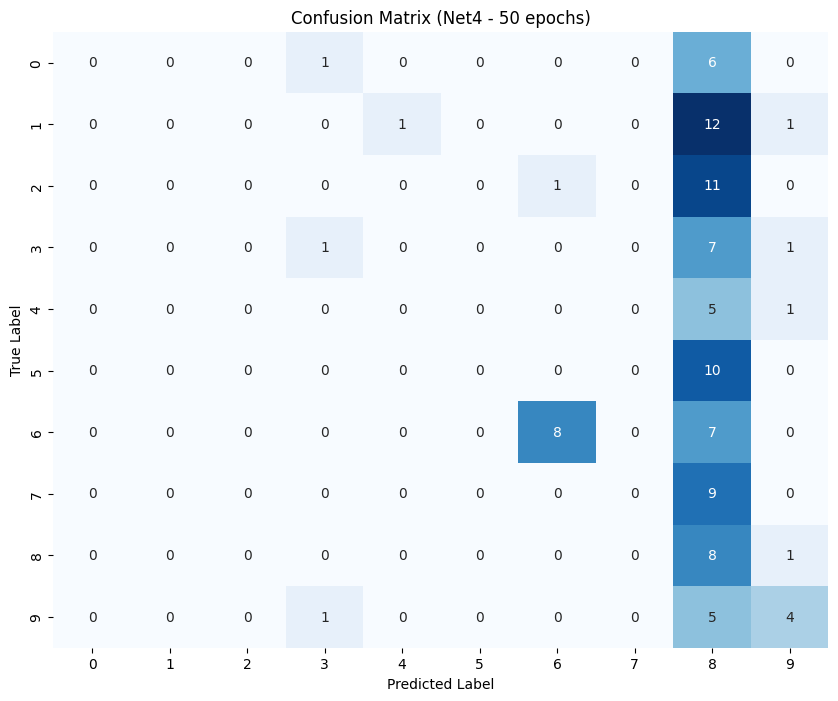

In [38]:
# Confusion matrix for Net4 after 50 epochs
all_predictions_net4_50epochs, all_targets_net4_50epochs = get_all_predictions(net4_50epochs, test_loader)
cm_net4_50epochs = confusion_matrix(all_targets_net4_50epochs, all_predictions_net4_50epochs)

# Plot confusion matrices
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net4_50epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net4 - 50 epochs)')
plt.show()

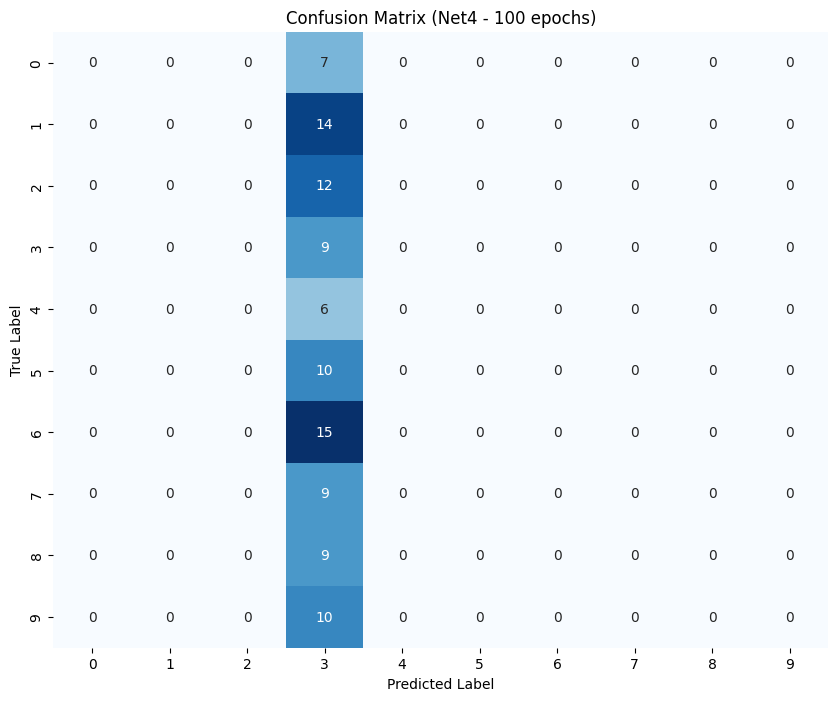

In [39]:
# Confusion matrix for Net4 after 100 epochs
all_predictions_net4_100epochs, all_targets_net4_100epochs = get_all_predictions(net4_100epochs, test_loader)
cm_net4_100epochs = confusion_matrix(all_targets_net4_100epochs, all_predictions_net4_100epochs)

# Plot confusion matrices
plt.figure(figsize=(10, 8))
sns.heatmap(cm_net4_100epochs, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Net4 - 100 epochs)')
plt.show()

##### 2. Generate the Classification report
It provides detailed evaluation metrics for each class in a multi-class classification problem for 50 and 100 epochs.

In [40]:
# Classification report for Net4 at epoch 50
report_net4_50epochs = classification_report(all_targets_net4_50epochs, all_predictions_net4_50epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net4 - 50 epochs):")
print(report_net4_50epochs)

Classification Report (Net4 - 50 epochs):
              precision    recall  f1-score   support

       blues       1.00      0.00      0.00         7
   classical       1.00      0.00      0.00        14
     country       1.00      0.00      0.00        12
       disco       0.33      0.11      0.17         9
      hiphop       0.00      0.00      1.00         6
        jazz       1.00      0.00      0.00        10
       metal       0.89      0.53      0.67        15
         pop       1.00      0.00      0.00         9
      reggae       0.10      0.89      0.18         9
        rock       0.50      0.40      0.44        10

    accuracy                           0.21       101
   macro avg       0.68      0.19      0.25       101
weighted avg       0.73      0.21      0.23       101



In [41]:
# Classification report for Net4 at epoch 100
report_net4_100epochs = classification_report(all_targets_net4_100epochs, all_predictions_net4_100epochs, target_names=class_names, zero_division=1)
print("Classification Report (Net4 - 100 epochs):")
print(report_net4_100epochs)

Classification Report (Net4 - 100 epochs):
              precision    recall  f1-score   support

       blues       1.00      0.00      0.00         7
   classical       1.00      0.00      0.00        14
     country       1.00      0.00      0.00        12
       disco       0.09      1.00      0.16         9
      hiphop       1.00      0.00      0.00         6
        jazz       1.00      0.00      0.00        10
       metal       1.00      0.00      0.00        15
         pop       1.00      0.00      0.00         9
      reggae       1.00      0.00      0.00         9
        rock       1.00      0.00      0.00        10

    accuracy                           0.09       101
   macro avg       0.91      0.10      0.02       101
weighted avg       0.92      0.09      0.01       101



##### 3. Calculate the Precision, Recall and F1-score
For each class, Calculate the Precision Recall and F1-score for 100 epochs. Also calculate the overall metrics.

In [42]:
# Calculate precision, recall, and F1-score for each class
precision_per_class_net4_100epochs = precision_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average=None, zero_division=1)
recall_per_class_net4_100epochs = recall_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average=None, zero_division=1)
f1_per_class_net4_100epochs = f1_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average=None, zero_division=1)

class_metrics_net4 = {
    "Class": class_names,
    "Precision": precision_per_class_net4_100epochs,
    "Recall": recall_per_class_net4_100epochs,
    "F1-score": f1_per_class_net4_100epochs
}

class_metrics_df = pd.DataFrame(class_metrics_net4)
print(class_metrics_df)

       Class  Precision  Recall  F1-score
0      blues   1.000000     0.0  0.000000
1  classical   1.000000     0.0  0.000000
2    country   1.000000     0.0  0.000000
3      disco   0.089109     1.0  0.163636
4     hiphop   1.000000     0.0  0.000000
5       jazz   1.000000     0.0  0.000000
6      metal   1.000000     0.0  0.000000
7        pop   1.000000     0.0  0.000000
8     reggae   1.000000     0.0  0.000000
9       rock   1.000000     0.0  0.000000


In [45]:
# Calculate overall precision, recall, and F1-score
overall_precision_net4 = precision_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average='weighted',zero_division=1)
overall_recall_net4 = recall_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average='weighted')
overall_f1_net4 = f1_score(all_targets_net4_100epochs, all_predictions_net4_100epochs, average='weighted')

print("Overall Precision:", overall_precision_net4)
print("Overall Recall:", overall_recall_net4)
print("Overall F1-score:", overall_f1_net4)

Overall Precision: 0.918831487109107
Overall Recall: 0.0891089108910891
Overall F1-score: 0.01458145814581458


##### 4. Plot the Precision-Recall curve
For each class, Plot the Precision-Recall curve for 100 epochs.

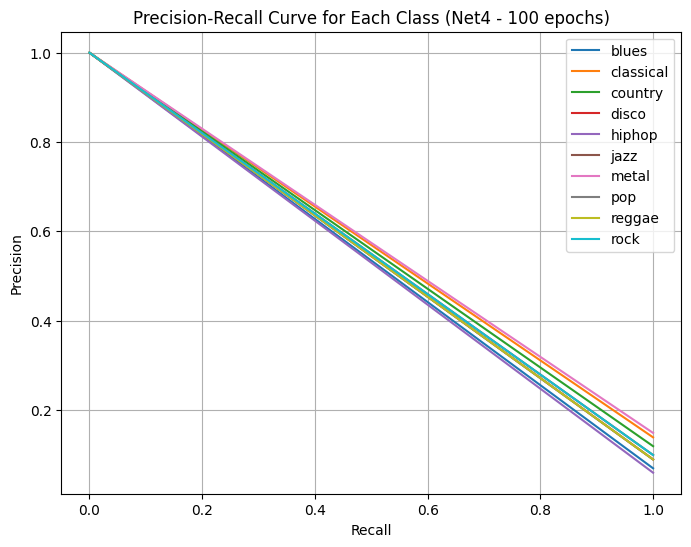

In [46]:
# Initialize empty lists to store precision and recall for each class
precision_per_class_curve_net4 = []
recall_per_class_curve_net4 = []

# Iterate over each class
for i in range(num_classes):
    # Treat the current class as positive, and all other classes as negative
    y_true_class = [1 if label == i else 0 for label in all_targets_net4_100epochs]
    y_score_class = [1 if label == i else 0 for label in all_predictions_net4_100epochs]
    precision, recall, _ = precision_recall_curve(y_true_class, y_score_class)
    precision_per_class_curve_net4.append(precision)
    recall_per_class_curve_net4.append(recall)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    class_name = class_names[i] 
    plt.plot(recall_per_class_curve_net4[i], precision_per_class_curve_net4[i], label=f'{class_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (Net4 - 100 epochs)')
plt.legend()
plt.grid(True)
plt.show()

##### 5. Calculate the area under the Precision-Recall curve.
For each class, Calculate the area under the Precision-Recall curve for 100 epochs.

In [47]:
auc_per_class = []

for i in range(num_classes):
    # Calculate AUC for the Precision-Recall curve of the current class
    auc_class = auc(recall_per_class_curve_net4[i], precision_per_class_curve_net4[i])
    auc_per_class.append(auc_class)

for i, class_name in enumerate(class_names):
    print(f"AUC for {class_name}: {auc_per_class[i]}")

AUC for blues: 0.5346534653465347
AUC for classical: 0.5693069306930694
AUC for country: 0.5594059405940595
AUC for disco: 0.5445544554455446
AUC for hiphop: 0.5297029702970297
AUC for jazz: 0.5495049504950495
AUC for metal: 0.5742574257425742
AUC for pop: 0.5445544554455446
AUC for reggae: 0.5445544554455446
AUC for rock: 0.5495049504950495


##### 6. Calculate class-wise accuracy.
For each class, Calculate class-wise accuracy for 100 epochs.

In [48]:
# Calculate class-wise accuracy for Net4
classwise_accuracy_net4 = calculate_classwise_accuracy(net4_100epochs, test_loader, num_classes)
for i in range(num_classes):
    print(f"Class name: {class_names[i]}, Accuracy: {classwise_accuracy_net4[i]}")

Class name: blues, Accuracy: 0.0
Class name: classical, Accuracy: 0.0
Class name: country, Accuracy: 0.0
Class name: disco, Accuracy: 1.0
Class name: hiphop, Accuracy: 0.0
Class name: jazz, Accuracy: 0.0
Class name: metal, Accuracy: 0.0
Class name: pop, Accuracy: 0.0
Class name: reggae, Accuracy: 0.0
Class name: rock, Accuracy: 0.0


##### 7. Visualize some predictions along with their ground truth labels
We iterate through a few sample images from the test dataset, displaying each image alongside its predicted and actual class labels. 
It helps visually assess the model's performance by comparing its predictions with the ground truth labels.

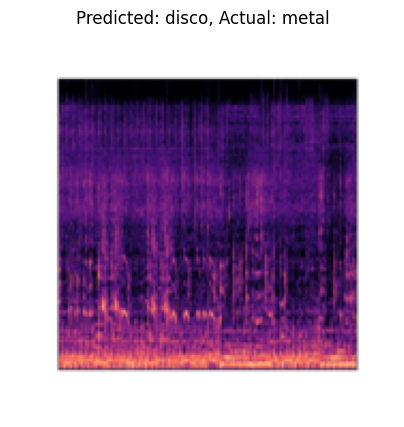

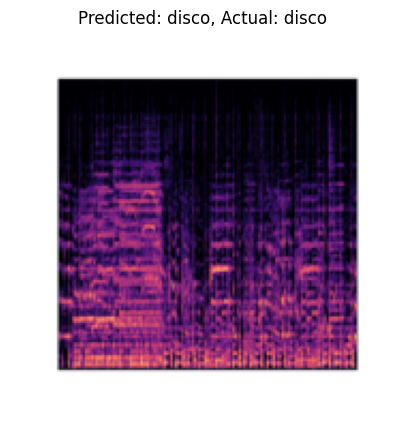

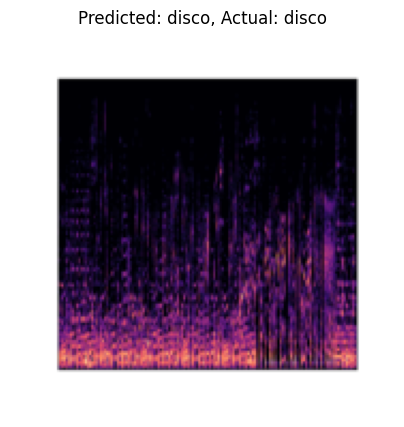

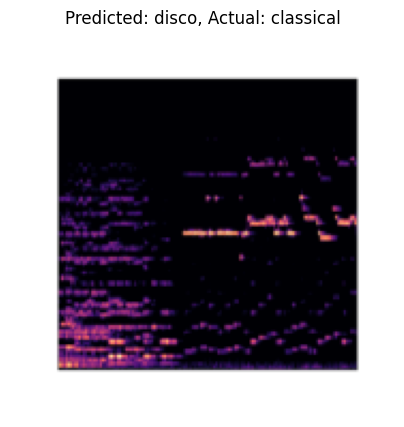

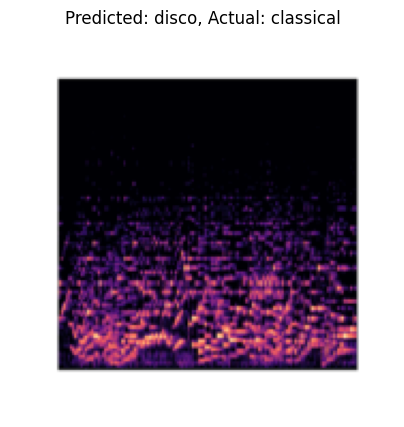

In [49]:
num_images_to_visualize = 5

for i in range(num_images_to_visualize):
    # Select a random index from the test dataset
    idx = np.random.randint(len(test_dataset))
    image, label = test_dataset[idx]
    net4_100epochs.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)
        output = net4_100epochs(image)
        _, predicted = torch.max(output, 1)
        predicted_class = class_names[predicted.item()]
        actual_class = class_names[label]
        
    plt.figure(figsize=(5, 5))
    plt.imshow(image.squeeze().permute(1, 2, 0).cpu())
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()